In [1]:
import os, glob, pickle
import sys
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
%matplotlib inline

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(path) 
from utils.training import train_cplmixVAE
from utils.eval_models import eval_mixmodel
from utils.cluster_analysis import K_selection

In [3]:
n_run = 3
n_categories = 10
state_dim = 10
n_arm = 2
tau = .1
fc_dim = 100
latent_dim = 30
lr = 0.001
p_drop = .2
batch_size = 1000
n_epoch = 1000
n_epoch_p = 1000
n_gene = 7787 #4130
subclass = 'L4-IT'
device = None

In [4]:
data_path = path + '/data/AD_MTG_L4-IT_nGene_' + str(n_gene) + '_nDonor_84.p'
folder_name = f'{subclass}_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

In [5]:
models = glob.glob(saving_folder + '/model/cpl_mixVAE_model_*')
cpl_mixVAE, data, sum_dict = eval_mixmodel(n_categories=n_categories, 
                                       state_dim=state_dim, 
                                       n_arm=n_arm,
                                       latent_dim=latent_dim,
                                       fc_dim=fc_dim,
                                       tau=tau,
                                       subclass=subclass,
                                       saving_folder=saving_folder, 
                                       data_path=data_path,
                                       device=device,
                                       models=models)

loading AD L4-IT data ... 


KeyboardInterrupt: 

/Users/yeganeh.marghi/github/cplmix_AD/utils/cluster_analysis.py:165: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig_1.add_subplot()


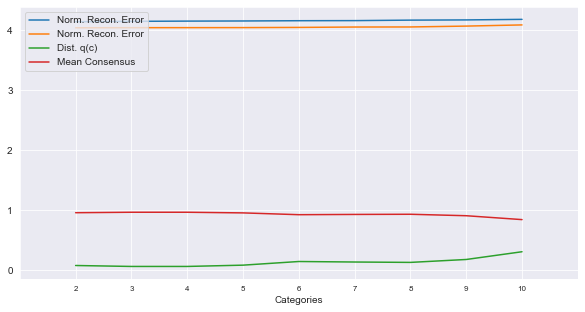

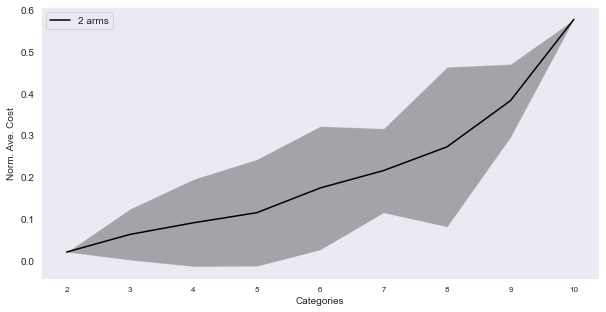

In [6]:
fig1, fig2 = K_selection(sum_dict, n_categories, n_arm, n_gene)

In [5]:
model_order = 5
selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_after_pruning_' + str(n_categories - model_order) + '*')[0]
cpl_mixVAE, data, outcome = eval_mixmodel(n_categories=n_categories, 
                           state_dim=state_dim, 
                           n_arm=n_arm,
                           latent_dim=latent_dim,
                           fc_dim=fc_dim,
                           tau=tau,
                           subclass=subclass,
                           saving_folder=saving_folder, 
                           data_path=data_path,
                           device=device,
                           all_data=True,
                           models=[selected_model])

loading AD L4-IT data ... 
Data is loaded
['L4 IT_1' 'L4 IT_2' 'L4 IT_3' 'L4 IT_4']
['UWA 6948' 'UWA 6962' 'UWA 6965' 'UWA 6966' 'UWA 6967' 'UWA 6983'
 'UWA 6989' 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999'
 'UWA 7000' 'UWA 7017' 'UWA 7027' 'UWA 7028' 'UWA 7038' 'UWA 7041'
 'UWA 7043' 'UWA 7045' 'UWA 7048' 'UWA 7049' 'UWA 7051' 'UWA 7055'
 'UWA 7056' 'UWA 7058' 'UWA 7063' 'UWA 7064' 'UWA 7065' 'UWA 7067'
 'UWA 7100' 'UWA 7101' 'UWA 7113' 'UWA 7117' 'UWA 7119' 'UWA 7120'
 'UWA 7124' 'UWA 7128' 'UWA 7129' 'UWA 7136' 'UWA 7138' 'UWA 7144'
 'UWA 7146' 'UWA 7150' 'UWA 7152' 'UWA 7153' 'UWA 7157' 'UWA 7159'
 'UWA 7161' 'UWA 7163' 'UWA 7170' 'UWA 7175' 'UWA 7179' 'UWA 7181'
 'UWA 7182' 'UWA 7183' 'UWA 7184' 'UWA 7186' 'UWA 7188' 'UWA 7197'
 'UWA 7227' 'UWA 7237' 'UWA 7239' 'UWA 7240' 'UWA 7244' 'UWA 7245'
 'UWA 7251' 'UWA 7264' 'UWA 7267' 'UWA 7268' 'UWA 7285' 'UWA 7288'
 'UWA 7290' 'UWA 7291' 'UWA 7297' 'UWA 7303' 'UWA 7317' 'UWA 7322'
 'UWA 7323' 'UWA 7370' 'UWA 7374' 'UWA 7377' 

In [7]:
data['log1p'].shape

(152052, 7787)

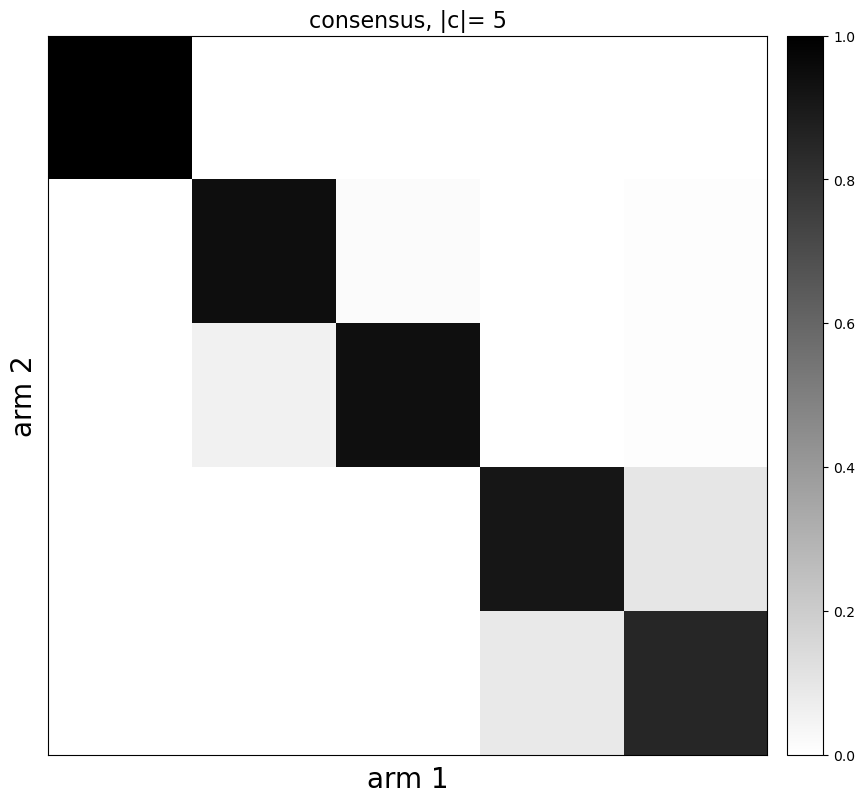

In [6]:
plt.figure(figsize=[10,10])
ax = plt.gca()
im = ax.imshow(outcome['consensus'][0], cmap='binary', vmax=1)
plt.xlabel('arm 1', fontsize=20)
plt.ylabel('arm 2', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.title('consensus, |c|= ' + str(outcome['consensus'][0].shape[0]), fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

In [7]:
data['supertype_scANVI'] = np.array(data['supertype_scANVI'])
# T_class = np.unique(data['supertype_scANVI'])
uniq_labels = np.unique(data['label'])
color = ['#ADE6A6', '#B8FFCA', '#82AD7D', '#A6E6A9', '#7AE6AB', '#D9F077',
       '#00979D', '#00A79D', '#008F1F', '#53879D', '#2F8C4D', '#33A9CE',
       '#0094C2', '#005C07', '#669D6A', '#00879D', '#00A809', '#26BF64',
       '#00FF00', '#00DDC5', '#26FFF2', '#3D9946', '#008F39', '#73CA95']
data['color'] = np.copy(data['cluster_color'])
uniq_clr, T_class, num_Tclass = [], [], []

for i_type, ttype in enumerate(uniq_labels):
    idx = np.where(data['label'] == ttype)[0]
    data['color'][idx] = color[i_type]
    uniq_clr.append(color[i_type])
    T_class.append(data['supertype_scANVI'][idx[0]])
    num_Tclass.append(len(idx))

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['supertype_scANVI'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
data['c_onehot'] = onehot_encoder.fit_transform(integer_encoded)
data['c_p'] = softmax((data['c_onehot'] + 1e-6) / 0.1, axis=1)

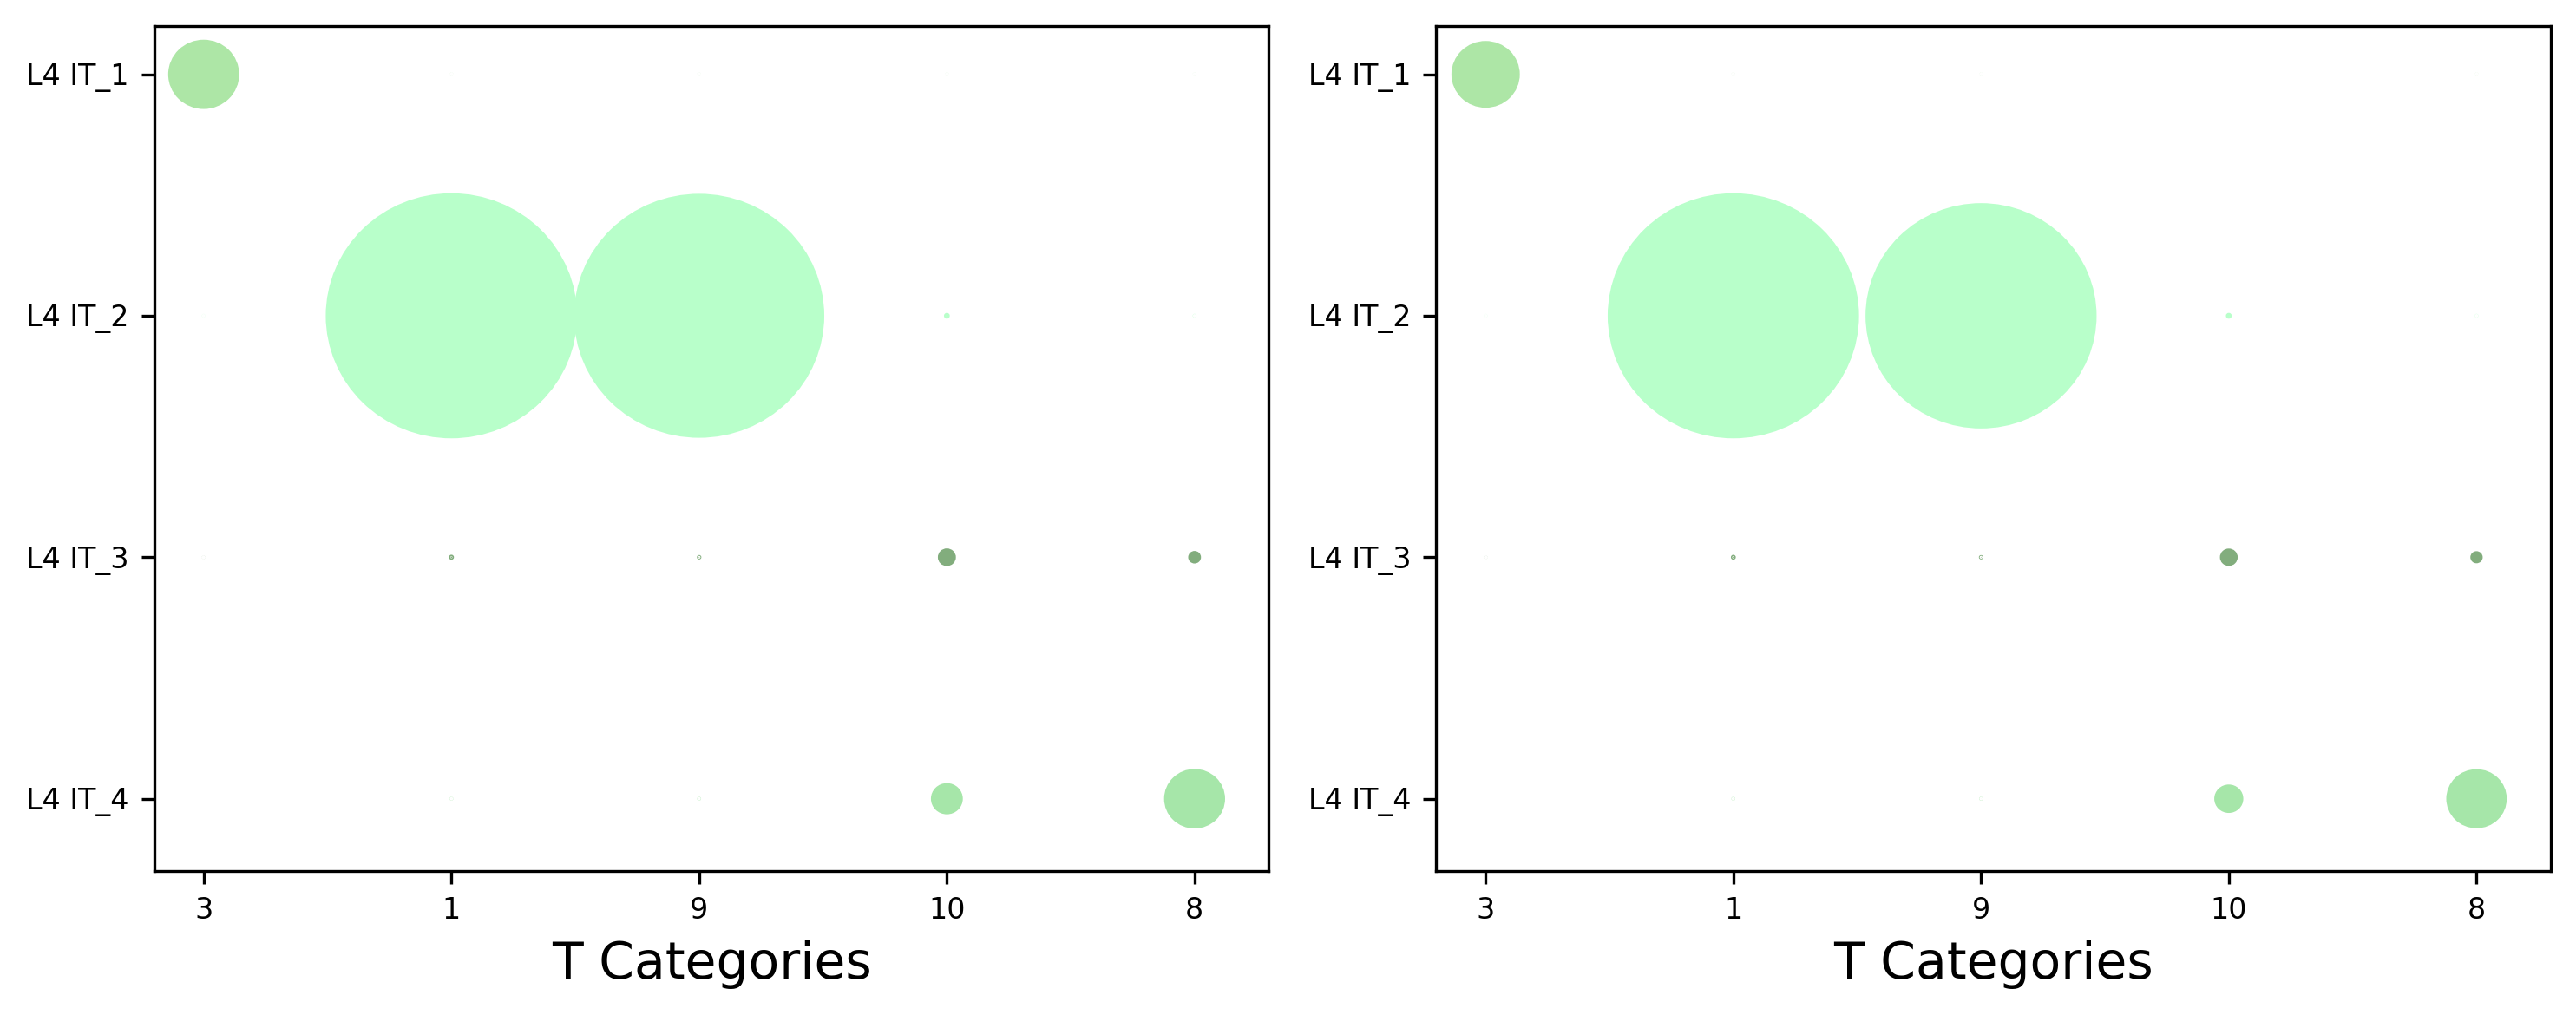

In [8]:
cT_vs_cT = outcome['cT_vs_cT'][0]
confm = np.zeros((n_arm, len(T_class), model_order))
fig, axs = plt.subplots(1, n_arm, figsize=(10, 4), dpi=300)
for arm in range(n_arm): 
    categories = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    perform_mat = cT_vs_cT[arm, :, :]
    row_sum = perform_mat.sum(axis=1)
    confm[arm, :, :] = np.divide(perform_mat, row_sum[:, np.newaxis], 
                        out=np.zeros_like(perform_mat), 
                        where=row_sum[:, np.newaxis]!=0)
    row_ind, col_ind = linear_sum_assignment(1 - perform_mat)

#     if model_order > len(T_class):
#         not_used_cat = [a for a in range(model_order) if a not in list(col_ind)]
#         cat_indx = np.concatenate((col_ind, np.array(not_used_cat)))
#     else:
#         cat_indx = col_ind
#     print(cat_indx)
    sort_idx = [np.argsort(perform_mat[it, :])[::-1] for it in range(len(T_class))]  
    sort_idx = np.vstack(sort_idx).astype(int)
    max_c_ind = -1 * np.ones(model_order) #sort_idx[:,0]
    if model_order > len(T_class):
        not_used_cat = [a for a in range(model_order) if a not in sort_idx[:,0]]
        for cc in not_used_cat:
            colm = np.argmax(perform_mat[:, cc].astype(int))
            find_indx = np.where(sort_idx[colm,0] == sort_idx[:,0])[0][0]
            max_c_ind[find_indx+1] = cc
        max_c_ind[max_c_ind==-1] = sort_idx[:,0]
        cat_indx = max_c_ind.astype(int)
    else:
        cat_indx = sort_idx[:, 0]

    mtx = perform_mat[:, cat_indx] / np.max(perform_mat[:, cat_indx]) / 2
    for l in range(len(T_class)):
        for col in range(model_order):
            xy = np.array([col, l])
            axs[arm].add_patch(plt.Circle(xy, radius=(mtx[l, col]), color=color[l]))
    axs[arm].set_xlim([-.2, model_order-.7])
    axs[arm].set_ylim([-.2, len(T_class)-.7])
    axs[arm].invert_yaxis()
    axs[arm].set_yticks(np.arange(len(T_class)))
    axs[arm].set_xticks(np.arange(model_order))
    axs[arm].set_yticklabels(T_class, fontsize=8)
    axs[arm].set_xticklabels(categories[cat_indx], fontsize=8)
    axs[arm].set_xlabel('T Categories', fontsize=14)
#     axs[0].set_ylabel('Supertypes', fontsize=14)


fig.tight_layout()
plt.savefig(saving_folder + '/categorical_rep_K_' + str(model_order) + '.png', dpi=600)

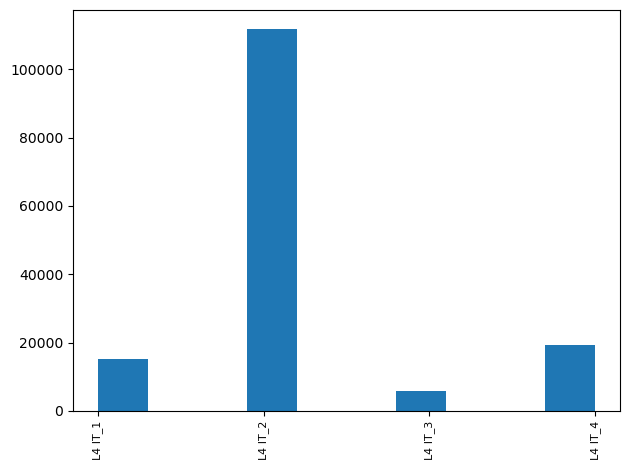

In [9]:
plt.figure()
plt.hist(data['label'])
    
plt.xticks(np.unique(data['label']), T_class, fontsize=8, rotation=90)
plt.tight_layout()
plt.savefig(saving_folder + '/subclass_posterior.png', dpi=600)
plt.show()

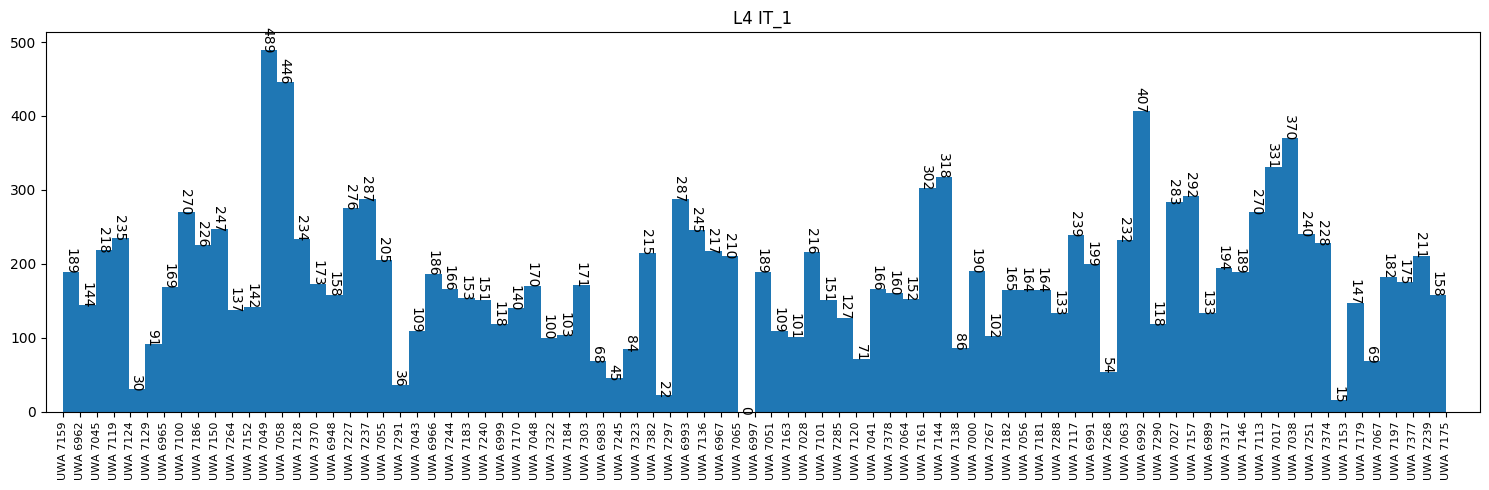

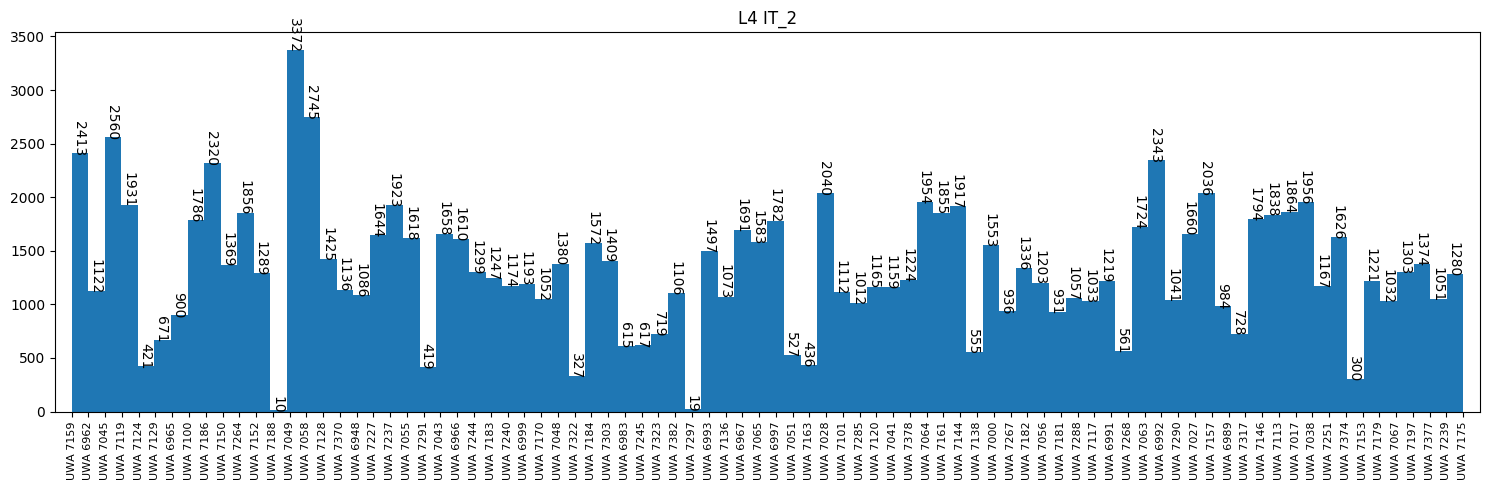

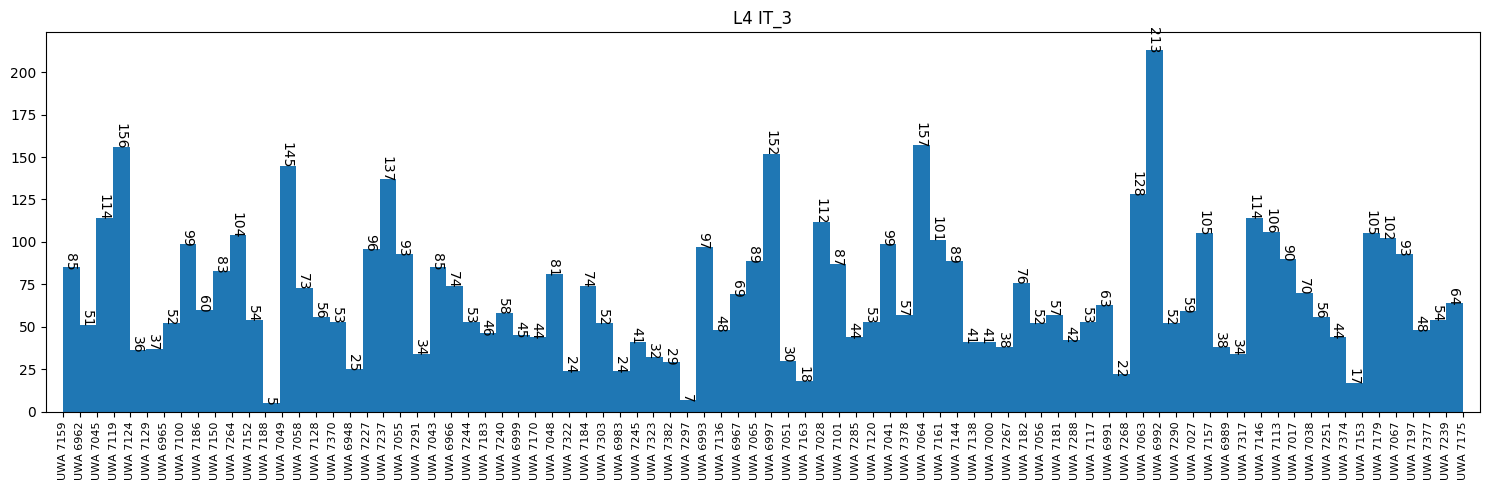

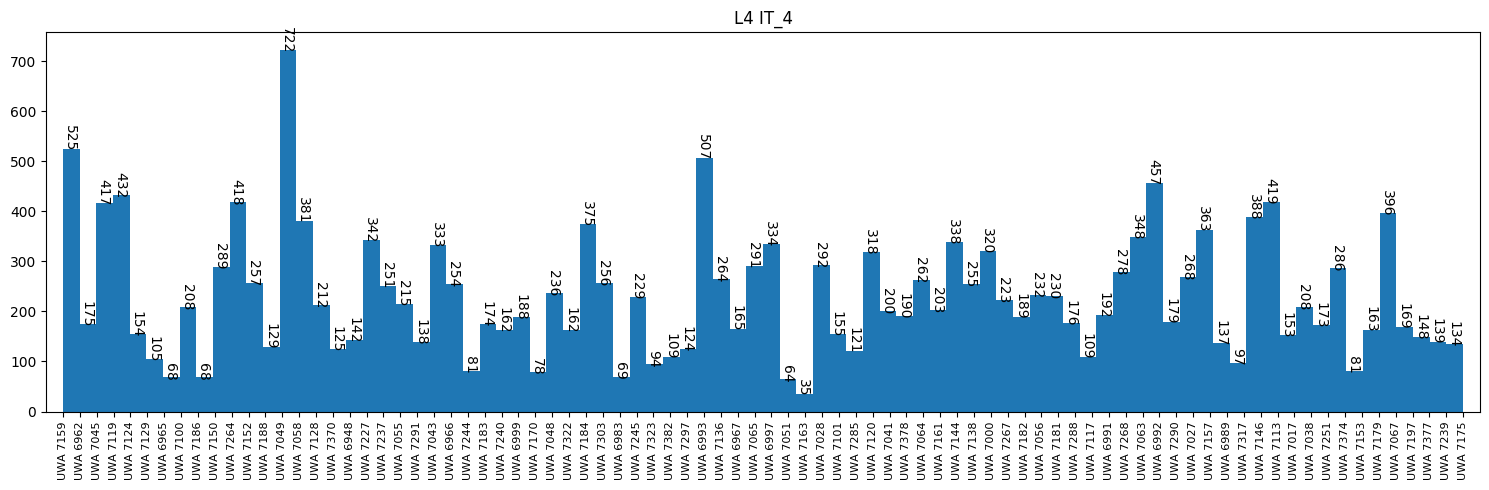

In [9]:
uniq_d = np.unique(data['external_donor_name'])
for ic, c in enumerate(T_class):
    plt.figure(figsize=[15, 5],dpi=100)
    hist = plt.hist(data['external_donor_name'][data['supertype_scANVI']==c], bins=len(uniq_d))
    for x,y in zip(hist[1], hist[0]):
        plt.text(x, y+.1, str(int(y)), fontsize=10, rotation=270)
        
    plt.xticks(fontsize=8, rotation=90)
    plt.xlim(-1, len(uniq_d))
    plt.title(c)
    plt.tight_layout()
    plt.savefig(saving_folder + '/supertype_' + str(ic) + '_distribution.png', dpi=600)
    plt.show()

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


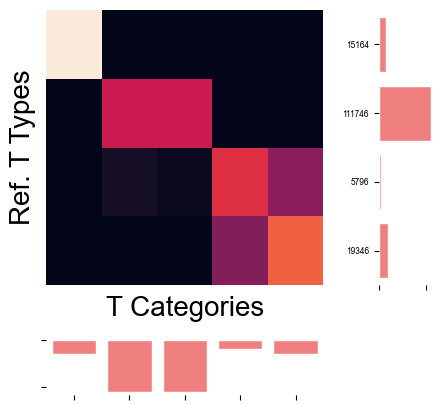

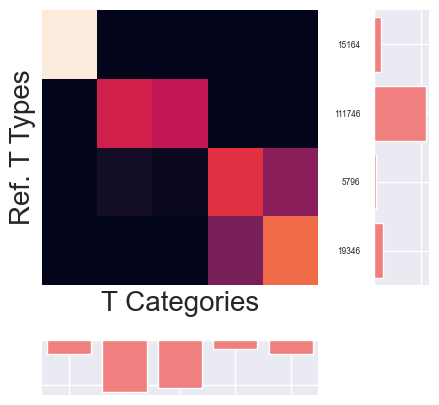

In [10]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    grid = plt.GridSpec(4, 4, hspace=1, wspace=1)
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=[], yticklabels=[], vmax=1, ax=ax_main, cbar=False)
    ax_main.set_ylabel('Ref. T Types', fontsize=20)
    ax_main.set_xlabel('T Categories', fontsize=20)
    ax_main.set_yticklabels(ax_main.get_yticklabels())

    # histogram on the right
    perform_mat = cT_vs_cT[arm, :, :]
    ax_bottom.bar(np.arange(model_order), np.sum(perform_mat[:, cat_indx], axis=0), color='lightcoral')
    # ax_bottom.set_ylim([0, 300])
    ax_bottom.invert_yaxis()
    ax_bottom.set_xlim([-.5, model_order-.5])
    ax_bottom.spines['top'].set_visible(False)
    ax_bottom.spines['right'].set_visible(False)
    ax_bottom.spines['bottom'].set_visible(False)
    ax_bottom.spines['left'].set_visible(False)

    # histogram in the bottom
    ax_right.barh(np.arange(len(T_class)), np.sum(perform_mat[:, cat_indx], axis=1).T, color='lightcoral')
    ax_right.set_ylim([-.5, len(T_class)-.5])
    # ax_right.set_xlim([0, 300])
    ax_right.set_yticks(np.arange(len(T_class)))
    ax_right.invert_yaxis()
    ax_right.set_yticklabels(np.sum(perform_mat[:, cat_indx], axis=1).astype(int), fontsize=6)
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_K_' + str(model_order) + '_arm_' + str(arm) + '.png', dpi=600)


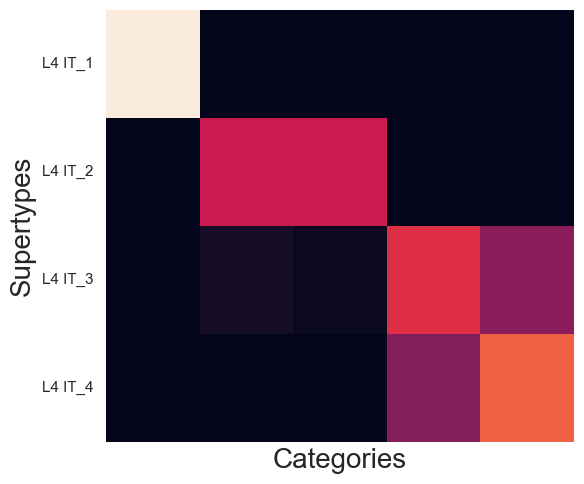

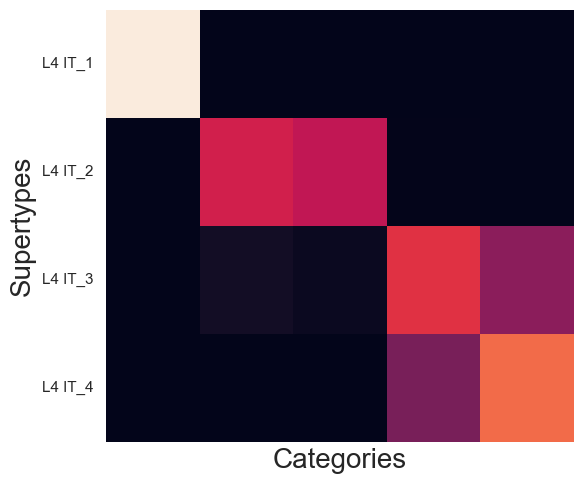

In [10]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(6, 5), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=[], 
                yticklabels=T_class, vmax=1, ax=ax, cbar=False)
    plt.yticks(rotation=0) 
    ax.set_ylabel('Supertypes', fontsize=20)
    ax.set_xlabel('Categories', fontsize=20)
    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_' + subclass + '_arm_' + str(arm) + '.png', dpi=600)

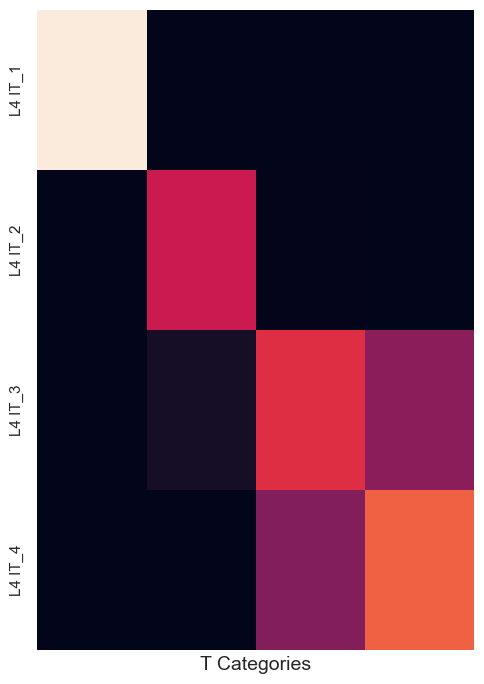

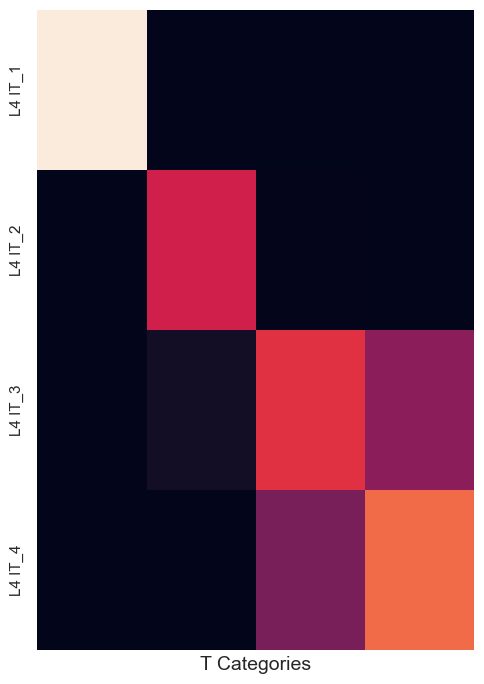

In [11]:
from sklearn.metrics import confusion_matrix

true_label = np.argmax(data['c_p'], axis=1)
T_class = np.array(T_class)

# class_reord = np.array([3,7,8,9,10,11,12,6,5,1,4,2,13])
# class_reord = (class_reord - 1).astype(int)

for arm in range(n_arm):
    categories = np.argmax(outcome['q_c'][-1][arm,:,:], axis=1)
    uniq_categories = np.unique(categories)
    prediction = np.zeros(len(categories))

    for ic, c in enumerate(uniq_categories):
        tmp_idx = np.where(categories == c)[0]
        prediction[tmp_idx] = ic

    conf_mat_sk = confusion_matrix(true_label, prediction, normalize='true')
    conf_mat_sk = conf_mat_sk[:len(T_class), :]
    conf_mat_sk = conf_mat_sk[:,:]
    conf_row_ind, conf_col_ind = linear_sum_assignment(1 - conf_mat_sk)
   
    fig = plt.figure(figsize=(5, 7), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(conf_mat_sk[:, conf_col_ind], xticklabels=[],
                yticklabels=T_class[:], vmin=0, vmax=1, ax=ax, cbar=False)
    
    ax.set_xlabel('T Categories', fontsize=14)
    fig.tight_layout()
    plt.savefig(saving_folder + f'/mi_{subclass}_K_{model_order}_arm_{arm}.png', dpi=600)


In [17]:
sum_dict = {}
sum_dict['conf_mat'] =  perform_mat[:, cat_indx]
sum_dict['T_class'] = T_class
sum_dict['n_cat'] = model_order
sum_dict['conf_mat_norm'] = confm[arm, :, cat_indx].T
sum_dict['df_ps'] = df_ps_time
sum_dict['df_pc'] = df_c_time
# sum_dict['bs_acc'] = bs_acc
sum_dict['c'] = cat[cat_indx]
f = open(saving_folder + f'/summary_L4ITsuperTypes.p', "wb")
pickle.dump(sum_dict, f)
f.close()

In [12]:
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)

NameError: name 'arm' is not defined

In [127]:
bs_acc

[0.3688405797101449,
 0.5656565656565656,
 0.5649190110826939,
 0.7027502067824649,
 0.40859619210002845]

1.0
1.0 1
using CPU ...
Total loss: 0.023468275122078403
Total loss: 0.00910964995273389
Total loss: 0.029773711443080435
Total loss: 0.02661768574866333
Total loss: 0.00882772461253418
Total loss: 0.027282039086068317
Total loss: 0.00830833233859656
Total loss: 0.0261801999045669
Total loss: 0.023073233439520533
Total loss: 0.008673019027420585


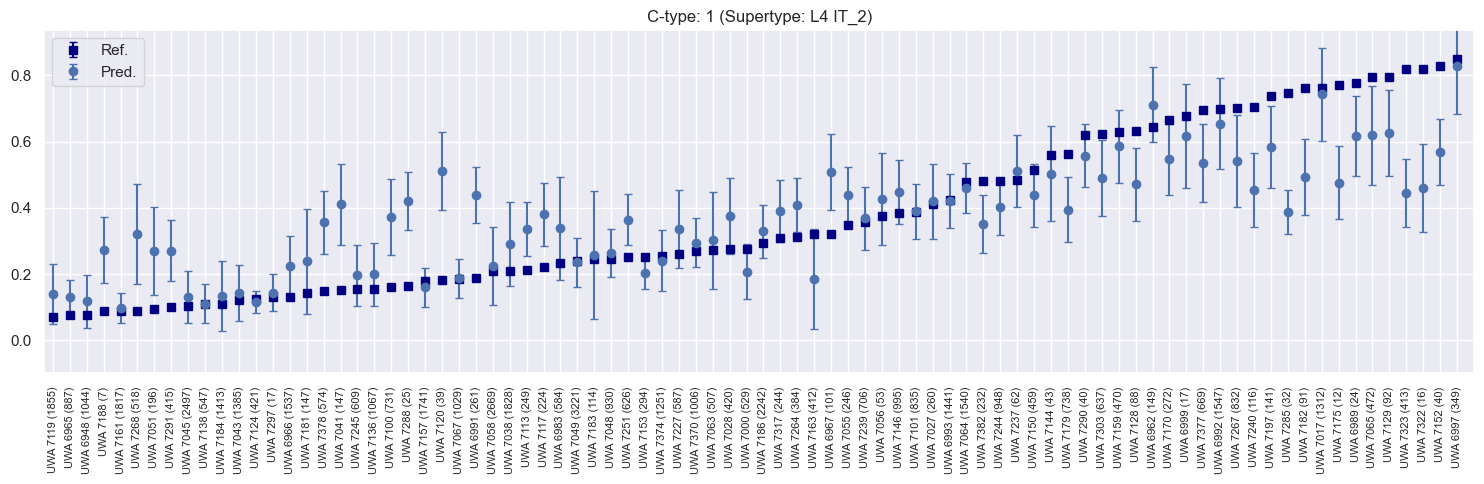

Pearsons correlation: 0.825
3.0
3.0 0
using CPU ...
Total loss: 0.017548796895425767


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Total loss: 0.019700410892255604
Total loss: 0.016010336228646338
Total loss: 0.016615359694696963
Total loss: 0.01768173708114773
Total loss: 0.018751717056147754
Total loss: 0.019435685826465487
Total loss: 0.01745021087117493
Total loss: 0.017842046276200563
Total loss: 0.017840125248767436


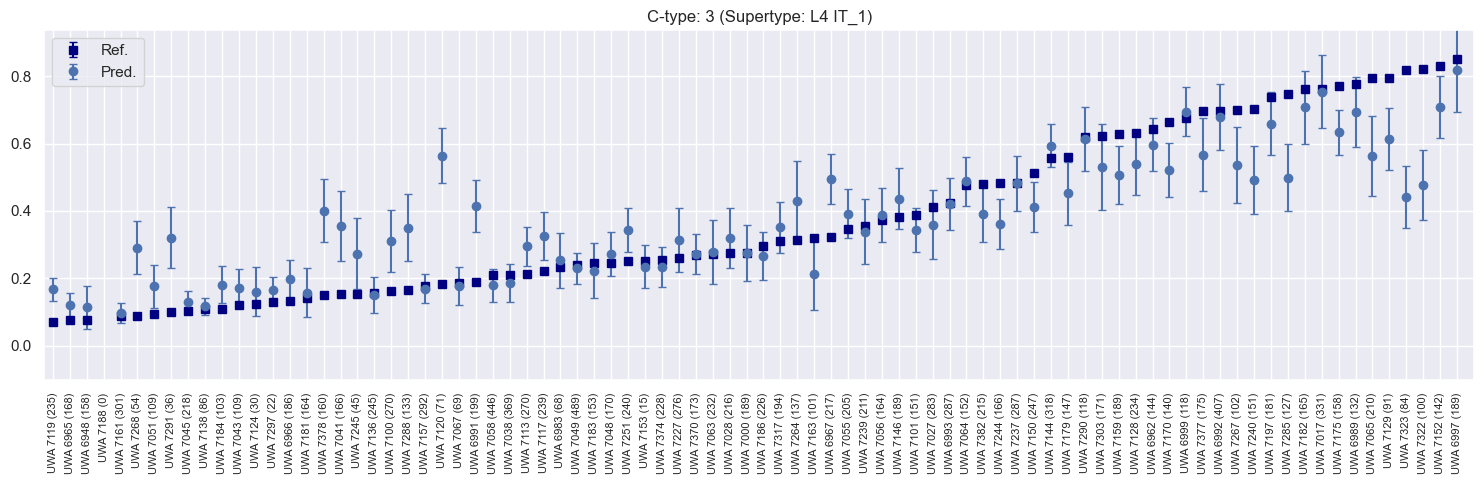

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.878
8.0
8.0 3
using CPU ...
Total loss: 0.021256000069635256
Total loss: 0.0237404237102185
Total loss: 0.021294161544314454
Total loss: 0.02337037372801985
Total loss: 0.021326273812779357
Total loss: 0.021684792957135608
Total loss: 0.02120702913297074
Total loss: 0.0218864217666643
Total loss: 0.021495751770479337
Total loss: 0.02430595736950636


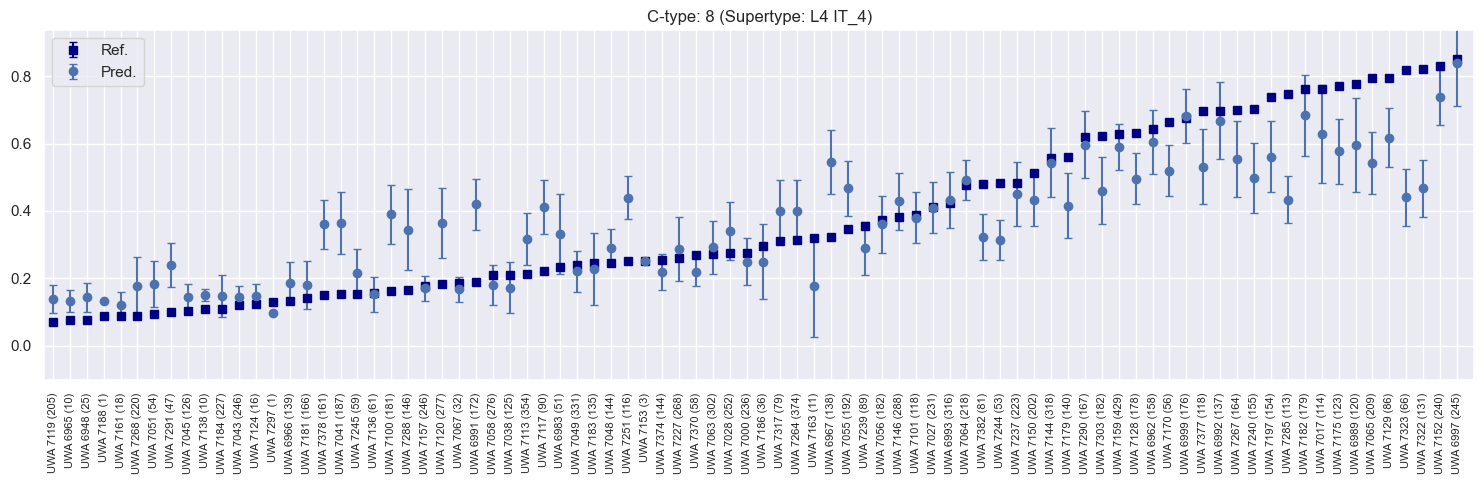

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.868
9.0
9.0 1
using CPU ...
Total loss: 0.014082503687989498
Total loss: 0.015338418572875006
Total loss: 0.01604379327701671
Total loss: 0.015612414189880448
Total loss: 0.015233324192065214
Total loss: 0.01527085225097835
Total loss: 0.015746105828189423
Total loss: 0.015371686778962612
Total loss: 0.01607422637087958
Total loss: 0.015297847999525922


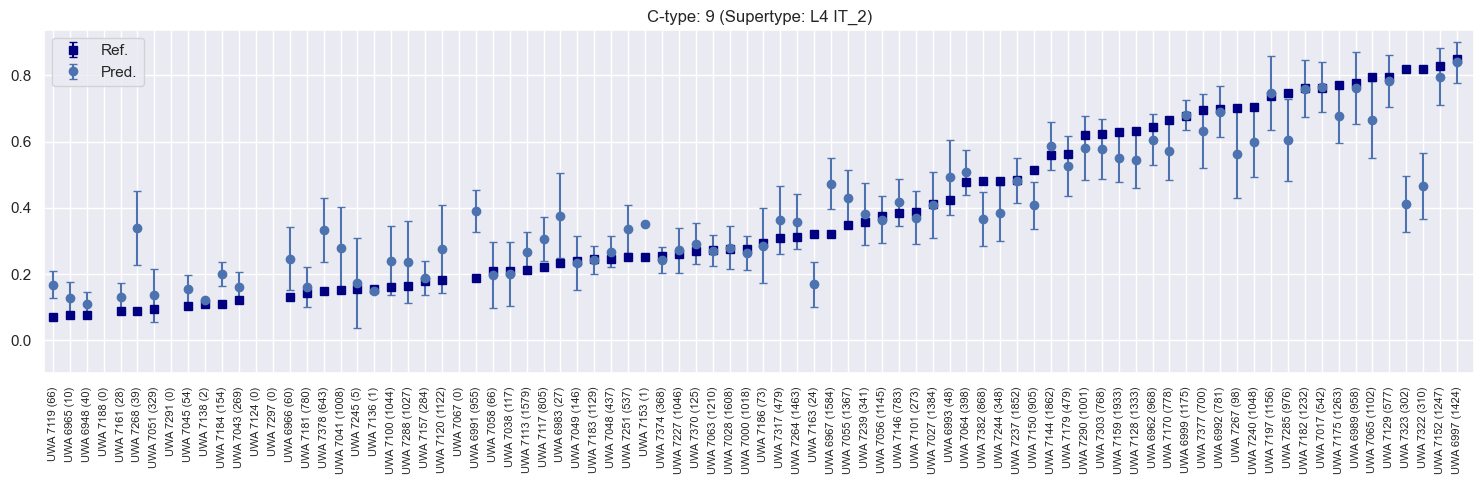

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.923
10.0
10.0 2
using CPU ...
Total loss: 0.019463177770376205
Total loss: 0.0216599740087986
Total loss: 0.01702802488580346
Total loss: 0.016498371493071318
Total loss: 0.017909697256982327
Total loss: 0.01718116831034422
Total loss: 0.019790736958384514
Total loss: 0.016323013231158257
Total loss: 0.01743415556848049
Total loss: 0.016960452776402235


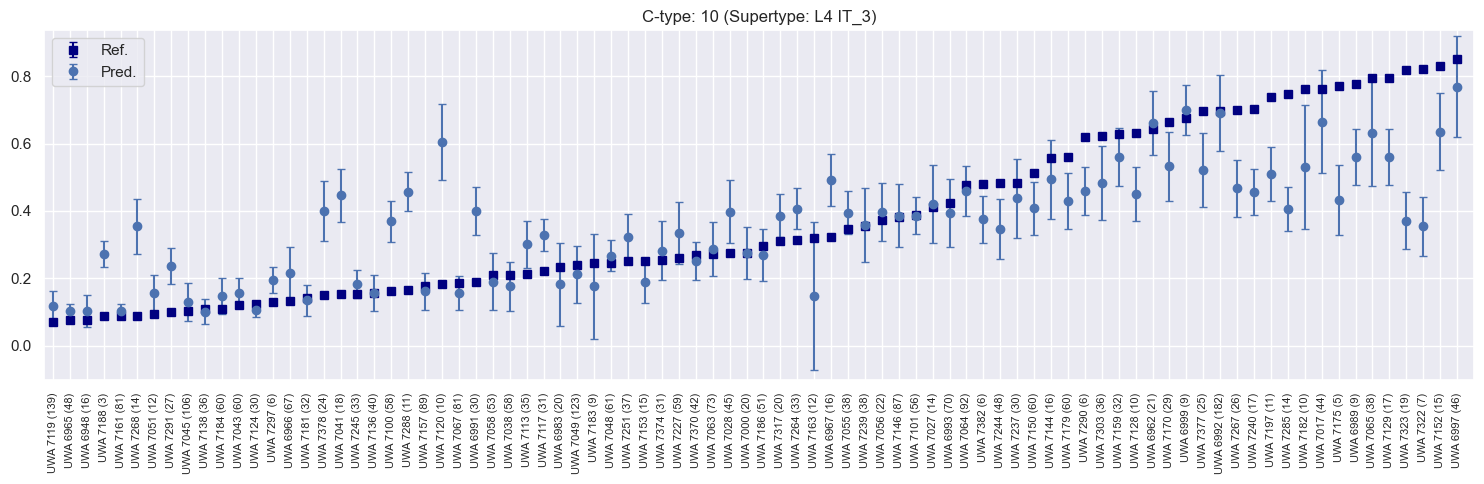

Pearsons correlation: 0.785


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [18]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import pandas as pd


arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['superype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['r2'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.errorbar(x, meta_true_mean,  yerr = meta_true_std, linestyle='None',  marker='s', mfc='Navy',
        mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        # plt.plot(x, y0, '--', color='black')
        plt.errorbar(x, meta_pred_mean,  yerr = meta_pred_std, linestyle='None',  fmt='ob',  capsize=3,  ecolor='b', label='Pred.')
        # plt.plot(x, y1, '-', color='blue')
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/ps_time_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [23]:
data['ps_time'][data['external_donor_name'] == 'UWA 6997']

array([0.85038367, 0.85038367, 0.85038367, ..., 0.85038367, 0.85038367,
       0.85038367])

In [ ]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr_all'] = np.zeros(len(cat))
df_ps_time['r2_all'] = np.zeros(len(cat))
df_ps_time['mse_all'] = np.zeros(len(cat))
df_ps_time['pearson_corr_mean'] = np.zeros(len(cat))
df_ps_time['r2_mean'] = np.zeros(len(cat))
df_ps_time['mse_mean'] = np.zeros(len(cat))
df_ps_time['pearson_corr_std'] = np.zeros(len(cat))
df_ps_time['r2_std'] = np.zeros(len(cat))
df_ps_time['mse_std'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))

overall_cell_ps = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    p_corr = []
    r_score = []
    mse_score = []
    
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            y_true = eval_dict[-1]['metadata']
            y_pred = eval_dict[-1]['prediction']
            meta_true.append(y_true)
            meta_pred.append(y_pred)
            error.append(np.mean(np.abs(y_true - y_pred)))
            corr, _ = pearsonr(y_true, y_pred)
            p_corr.append(corr)
            r_score.append(r2_score(y_true, y_pred))
            mse_score.append(np.mean((y_pred - y_true)**2))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
        ax = plt.axes()
        ax.set_facecolor("whitesmoke")
 
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        plt.plot(x, meta_true_mean, linestyle='None',  marker='s', markersize=6, color='Navy', label='True')
        plt.errorbar(x, meta_pred_mean, yerr=meta_pred_std, linestyle='None', fmt='ob',  
                     markersize=7, capsize=3,  ecolor='b', label='Predition')
        
            
        plt.grid(b=None)
        plt.xticks([]) #(x, xtick, rotation=90, fontsize=8)
        plt.yticks(fontsize=16)
        plt.xlabel('Donors', fontsize=fontsize-2)
        plt.ylabel('DP',fontsize=20, labelpad=10)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0., 1])
        plt.legend(fontsize=20, loc='lower right')
        
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        # plt.savefig(saving_folder + '/latest_qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr_all'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2_all'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse_all'][i_c] = np.mean((y_pred - y_true)**2)
        df_ps_time['pearson_corr_mean'][i_c] = np.mean(p_corr)
        df_ps_time['pearson_corr_std'][i_c] = np.std(p_corr)
        df_ps_time['r2_mean'][i_c] = np.mean(r_score)
        df_ps_time['r2_std'][i_c] = np.std(r_score)
        df_ps_time['mse_mean'][i_c] = np.mean(mse_score)
        df_ps_time['mse_std'][i_c] = np.std(mse_score)
        overall_cell_ps.append(np.array(num_cells))


In [ ]:
df_ps_time

In [79]:
late_donor_dict = pickle.load(open(saving_folder + f'/late_exclude_donors.p', 'rb'))
middle_donor_dict = pickle.load(open(saving_folder + f'/middle_exclude_donors.p', 'rb')) 
middle_donors = middle_donor_dict['donor'][:2]
late_donors = late_donor_dict['donor'][:3]
exclude_donors = np.concatenate((middle_donors, late_donors))
for key in late_donor_dict.keys():
    late_donor_dict[key] = np.array(late_donor_dict[key])
    middle_donor_dict[key] = np.array(middle_donor_dict[key])


1.0
1.0 L4 IT_2
using CPU ...
Total loss: 0.023026046712465328
Total loss: 0.008528341693755496
Total loss: 0.029703277371952247
Total loss: 0.026329077836447234
Total loss: 0.00847925606649369
Total loss: 0.026743585227763857
Total loss: 0.008069146146540177
Total loss: 0.025752041874260737
Total loss: 0.023159143322243773
Total loss: 0.008400872320635244


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


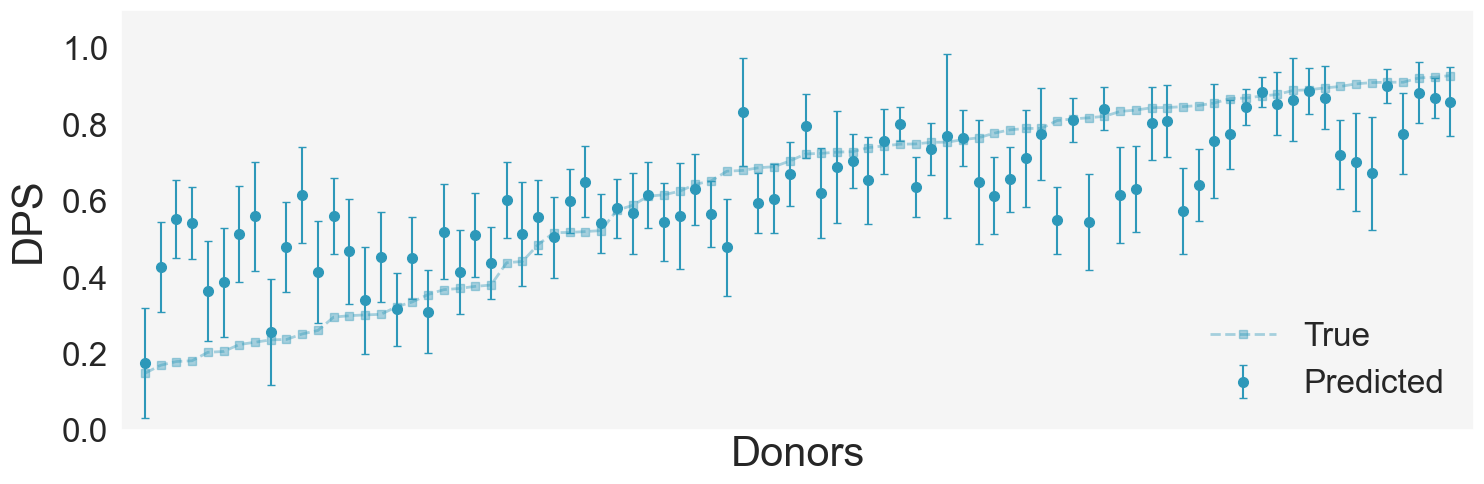

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.818
3.0
3.0 L4 IT_1
using CPU ...
Total loss: 0.016830975597258657
Total loss: 0.017571115866303444
Total loss: 0.016384308284614235
Total loss: 0.020335058332420886
Total loss: 0.016904082614928484
Total loss: 0.017219560220837593
Total loss: 0.019160496187396348
Total loss: 0.016401742701418698
Total loss: 0.017924437997862697
Total loss: 0.017803478054702282


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


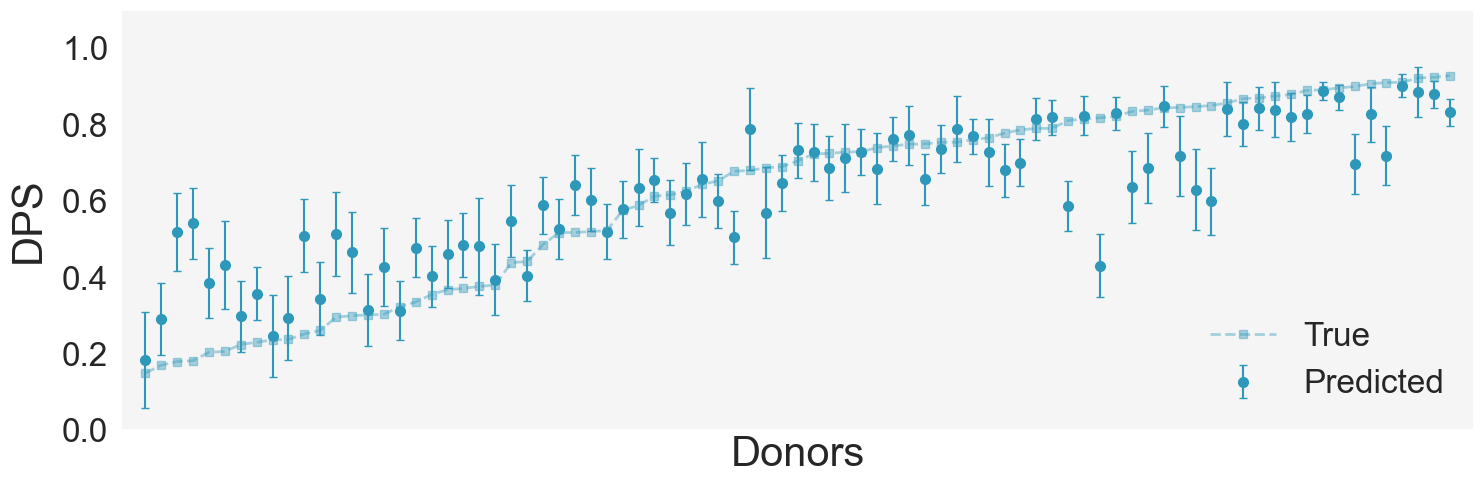

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.879
8.0
8.0 L4 IT_4
using CPU ...
Total loss: 0.0225407195976004
Total loss: 0.024644237710162997
Total loss: 0.020880463300272822
Total loss: 0.022970309597440064
Total loss: 0.023424902115948498
Total loss: 0.021665170788764954
Total loss: 0.02295949903782457
Total loss: 0.020719892694614828
Total loss: 0.023382980609312654
Total loss: 0.02314558159559965


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


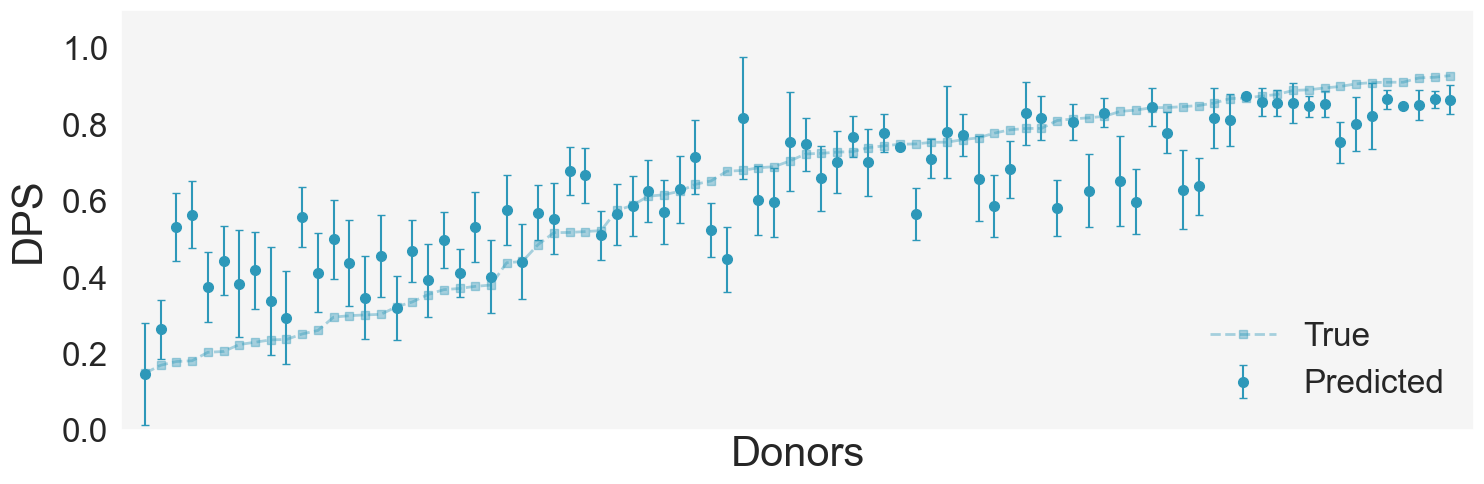

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.871
9.0
9.0 L4 IT_2
using CPU ...
Total loss: 0.015633009241095612
Total loss: 0.014965772994660906
Total loss: 0.01600540999788791
Total loss: 0.015867605032066683
Total loss: 0.01476326325376119
Total loss: 0.015649039747326503
Total loss: 0.015552979544736445
Total loss: 0.014242096837343914
Total loss: 0.015701242922140018
Total loss: 0.015257427485526673


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


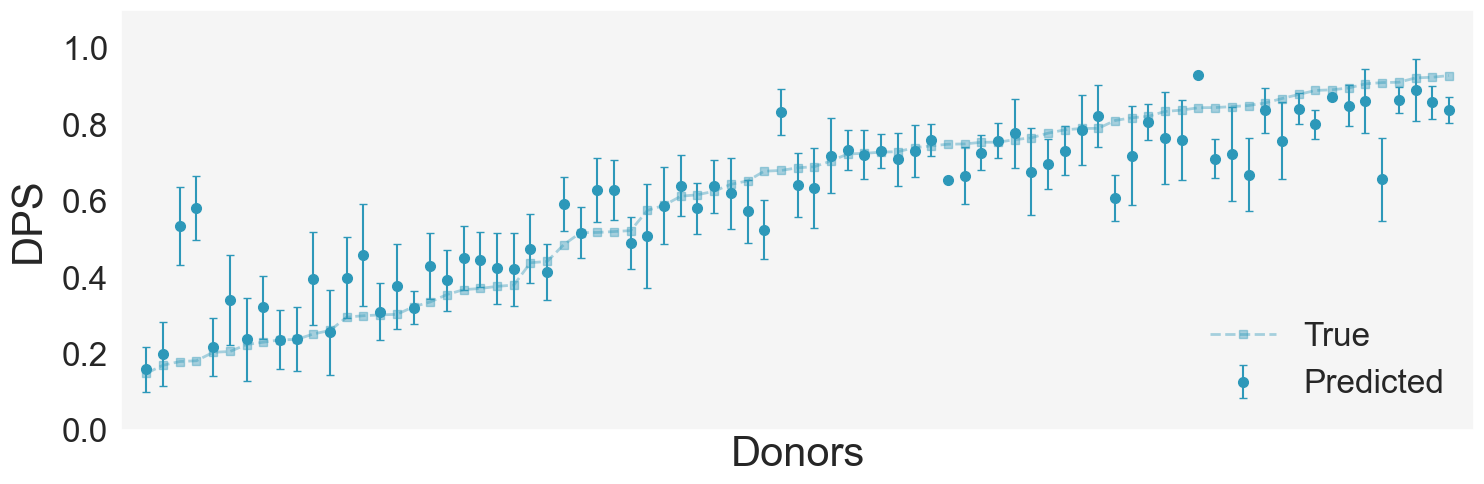

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.920
10.0
10.0 L4 IT_3
using CPU ...
Total loss: 0.013818723692869147
Total loss: 0.015242257388308644
Total loss: 0.015603167082493504
Total loss: 0.013960770176102718
Total loss: 0.01701036390538017
Total loss: 0.014974068733863533
Total loss: 0.01772797666490078
Total loss: 0.017079928889870644
Total loss: 0.016509439175327618
Total loss: 0.015863690835734207


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


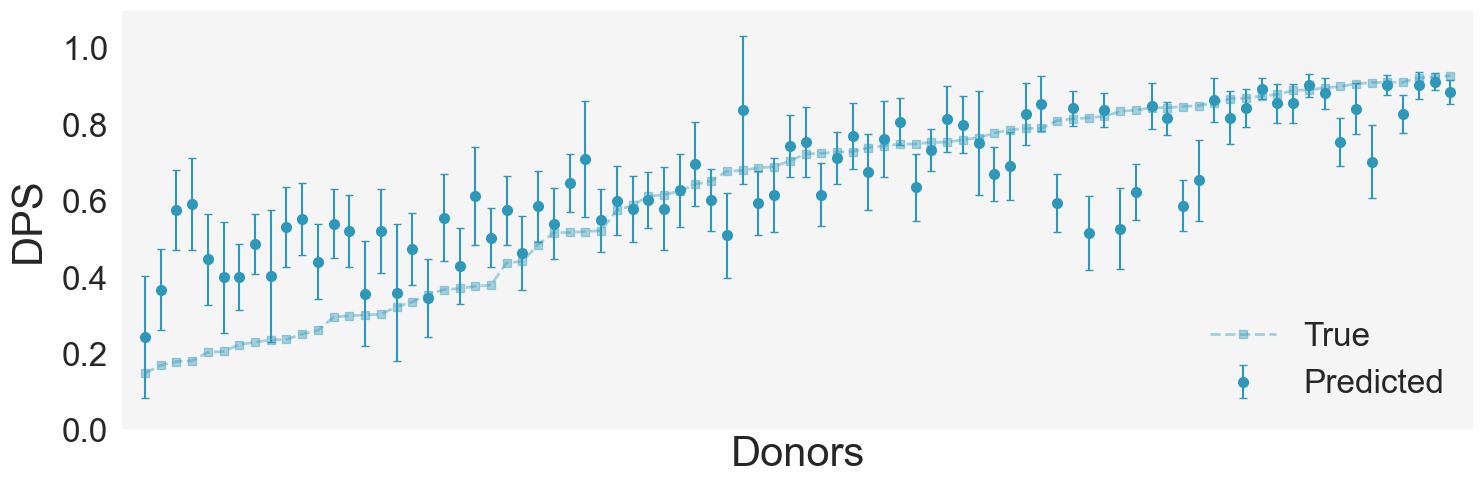

Pearsons correlation: 0.828


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [12]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr_all'] = np.zeros(len(cat))
df_ps_time['r2_all'] = np.zeros(len(cat))
df_ps_time['mse_all'] = np.zeros(len(cat))
df_ps_time['pearson_corr_mean'] = np.zeros(len(cat))
df_ps_time['r2_mean'] = np.zeros(len(cat))
df_ps_time['mse_mean'] = np.zeros(len(cat))
df_ps_time['pearson_corr_std'] = np.zeros(len(cat))
df_ps_time['r2_std'] = np.zeros(len(cat))
df_ps_time['mse_std'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))


overall_cell_ps = []
d_mild = []
d_sever = []
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    p_corr = []
    r_score = []
    mse_score = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    match_ttype = uniq_ref_t[np.argmax(norm_count)]
    print(c, match_ttype)
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            y_true = eval_dict[-1]['metadata']
            y_pred = eval_dict[-1]['prediction']
            meta_true.append(y_true)
            meta_pred.append(y_pred)
            error.append(np.mean(np.abs(y_true - y_pred)))
            corr, _ = pearsonr(y_true, y_pred)
            p_corr.append(corr)
            r_score.append(r2_score(y_true, y_pred))
            mse_score.append(np.mean((y_pred - y_true)**2))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(meta_true_mean[meta_true_mean > 0])) # np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
        ax = plt.axes()
        ax.set_facecolor("whitesmoke")

        tmp = meta_true_mean[meta_true_mean > 0]
        mild = np.where(tmp > 0.5)[0] 
        sever = np.where(tmp > 0.8)[0] 
        d_mild.append(x[mild[0]])
        d_sever.append(x[sever[0]])
 
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        plt.plot(x, meta_true_mean[meta_true_mean > 0], linestyle='--',  linewidth=2, marker='s', markersize=6, color='#2d98b9', alpha=0.4, label='True')
        plt.errorbar(x, meta_pred_mean[meta_true_mean > 0], yerr=meta_pred_std[meta_true_mean > 0], linestyle='None',  marker='o', fmt='#2d98b9',  
                     markersize=7, capsize=3,  ecolor='#2d98b9', label='Predicted')
            
        plt.grid(b=None)
        plt.xticks([]) #(x, xtick, rotation=90, fontsize=8)
        plt.yticks(fontsize=24)
        plt.xlabel('Donors', fontsize=30)
        plt.ylabel('DPS',fontsize=30, labelpad=10)
        plt.xlim([-1.5, np.max(x)+1.5])
        plt.ylim([0., 1.1])
        plt.legend(fontsize=24, loc='lower right', frameon=False)


        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
#         plt.savefig(saving_folder + '/latest_qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = match_ttype
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr_all'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2_all'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse_all'][i_c] = np.mean((y_pred - y_true)**2)
        df_ps_time['pearson_corr_mean'][i_c] = np.mean(p_corr)
        df_ps_time['pearson_corr_std'][i_c] = np.std(p_corr)
        df_ps_time['r2_mean'][i_c] = np.mean(r_score)
        df_ps_time['r2_std'][i_c] = np.std(r_score)
        df_ps_time['mse_mean'][i_c] = np.mean(mse_score)
        df_ps_time['mse_std'][i_c] = np.std(mse_score)
        overall_cell_ps.append(np.array(num_cells))


In [13]:
df_ps_time

,c,supertype,pearson_corr_all,r2_all,mse_all,pearson_corr_mean,r2_mean,mse_mean,pearson_corr_std,r2_std,mse_std,p_val
0,1.0,L4 IT_2,0.818462,0.645693,0.021222,0.756956,0.546079,0.074752,0.112995,0.209521,0.002796,1.966675e-21
1,3.0,L4 IT_1,0.878863,0.750253,0.014884,0.818369,0.669023,0.089532,0.012656,0.020417,0.001071,9.255226e-28
2,8.0,L4 IT_4,0.871119,0.733111,0.015986,0.766542,0.586953,0.088708,0.009459,0.014366,0.001034,4.740765e-27
3,9.0,L4 IT_2,0.919899,0.832770,0.009920,0.841834,0.708460,0.089889,0.005319,0.008950,0.001184,4.884122e-33
4,10.0,L4 IT_3,0.827832,0.644419,0.021298,0.805089,0.644613,0.083920,0.015819,0.026258,0.003056,2.734243e-22


In [97]:
c_sum_dn = []
for dn in np.unique(data['external_donor_name']):
    d_indx = np.where(data['external_donor_name'] == dn)[0]
    c_d = outcome['pred_label'][-1][arm][d_indx]
    c_sum_dn.append([sum(c_d == cc)/len(c_d) for cc in range(1, n_categories+1)])

c_sum_dn = np.vstack(c_sum_dn)
c_sum_dn.shape

(84, 10)

0 0.19801911661634775 0.29208511612936233 -0.4750349416781957 -3.9118474892323865 0.00034303944773485126
2 0.15917557543658997 0.14257894247867156 0.10426620360816559 2.047302541276898 0.04801268060301404
7 0.15701085671948364 0.17839576095276669 -0.13620016271543192 -1.945019676771477 0.06162227546830292


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


8 0.32542802675282057 0.18637494084924194 0.4272929018777987 5.9737610770485166 3.44691843525551e-07
9 0.1603664243124902 0.2005652405618847 -0.2506685325293719 -2.7085425878994345 0.011631287991287388


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


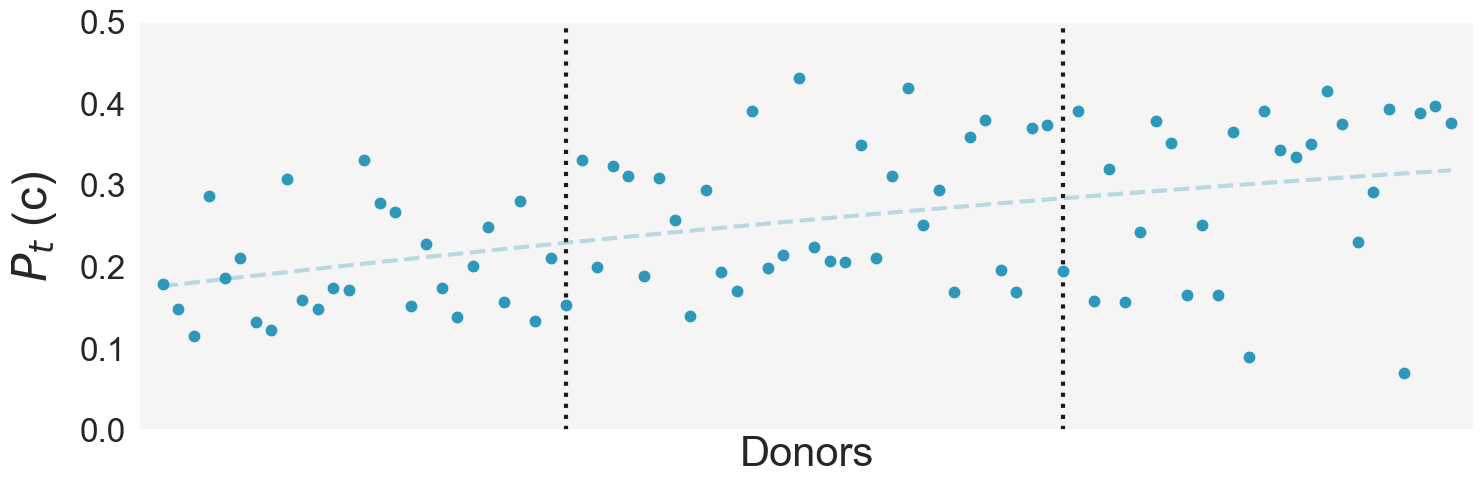

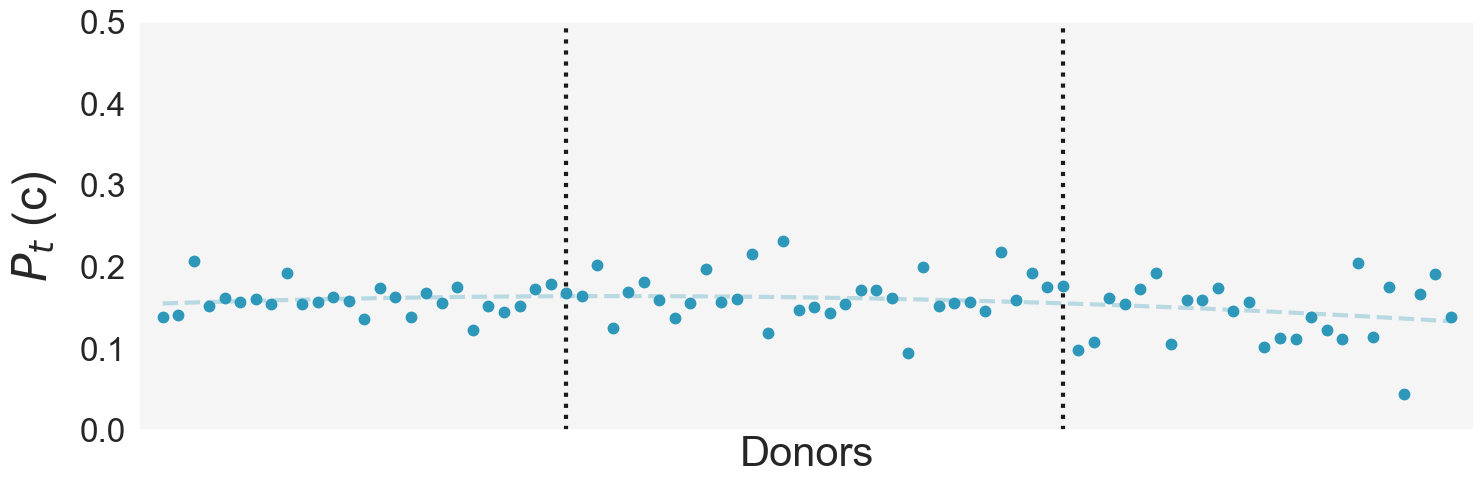

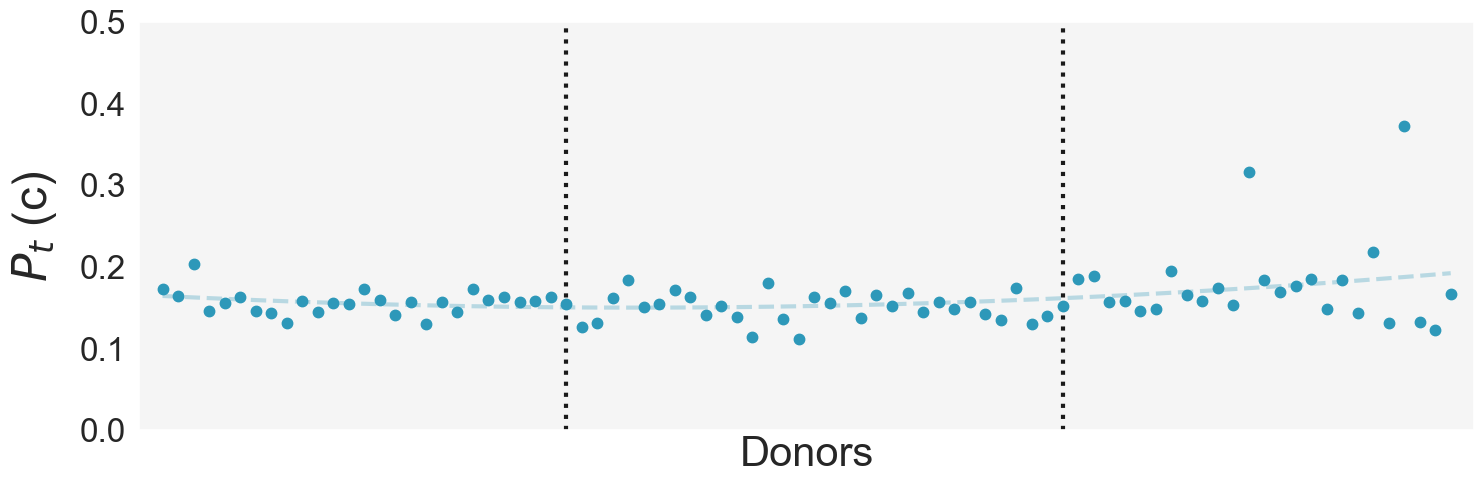

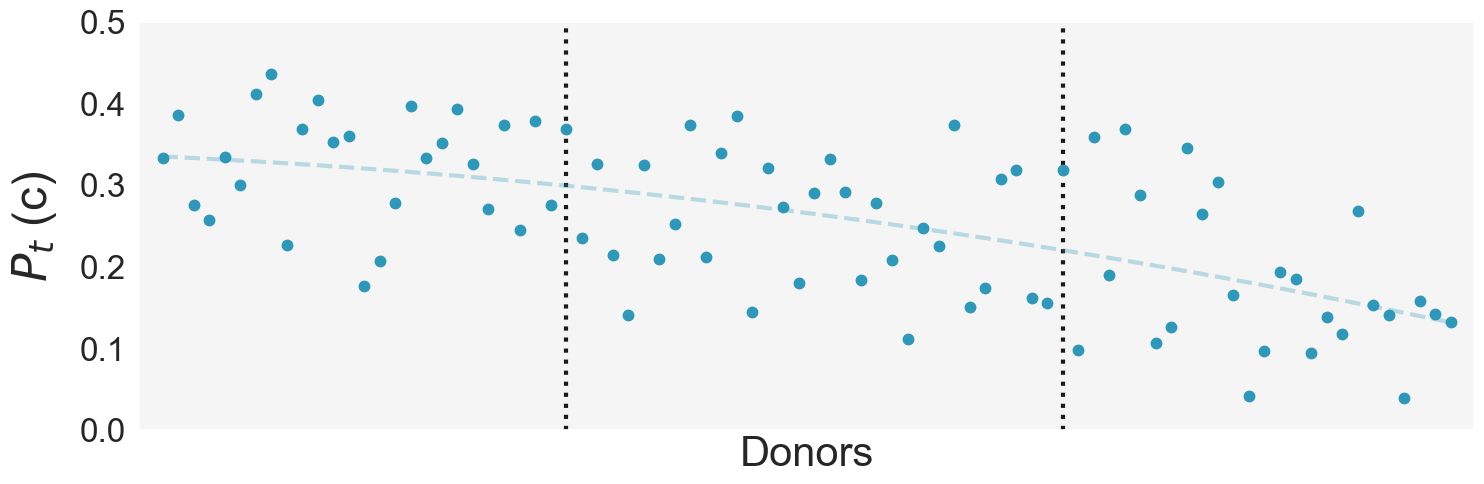

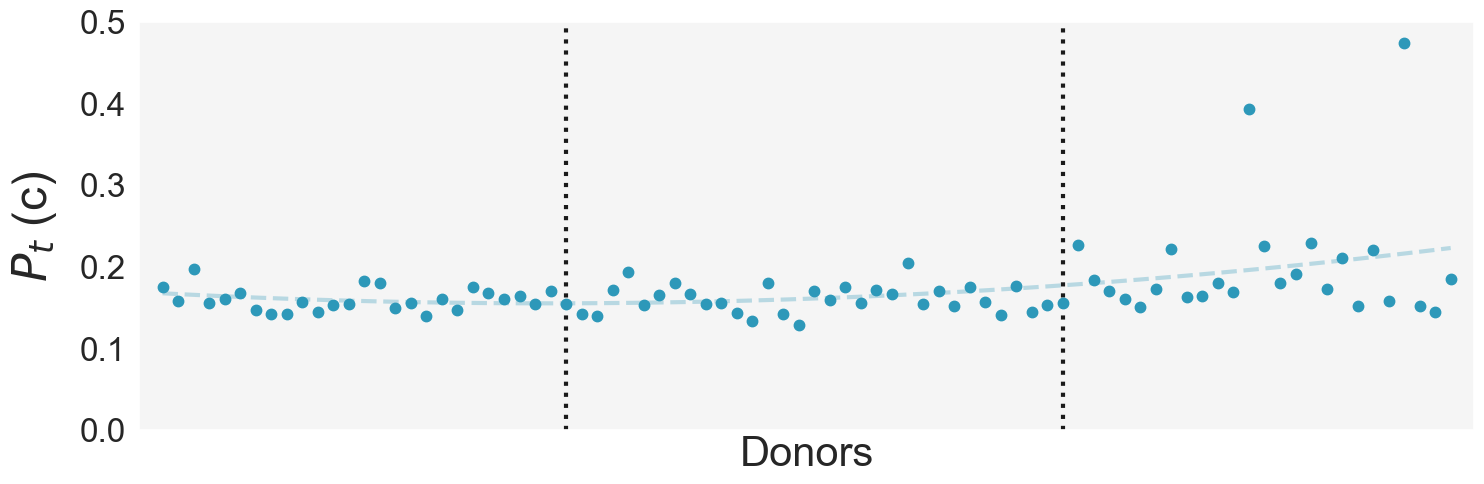

In [19]:
from sklearn.metrics import r2_score
from scipy import stats

df_c_time = pd.DataFrame()
df_c_time['c'] = np.zeros(n_categories * n_arm)
df_c_time['arm'] = np.zeros(n_categories * n_arm)
df_c_time['r2'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr_fit'] = np.zeros(n_categories * n_arm)
df_c_time['t_static'] = np.zeros(n_categories * n_arm)
df_c_time['p_ttest'] = np.zeros(n_categories * n_arm)
df_c_time['delta_pc'] = np.zeros(n_categories * n_arm)

count = 0
for arm in range(1):

    c_sum_dn = []
    for dn in np.unique(data['external_donor_name']):
        d_indx = np.where(data['external_donor_name'] == dn)[0]
        c_d = outcome['pred_label'][-1][arm][d_indx]
        c_sum_dn.append([sum(c_d == cc)/len(c_d) for cc in range(1, n_categories+1)])

    c_sum_dn = np.vstack(c_sum_dn)

    qc = outcome['q_c'][-1][arm, :, :]
    df_c = pd.DataFrame()
    df_c['c'] = outcome['pred_label'][-1][arm].astype(int)
    for ic in range(qc.shape[-1]):
        df_c[f'qc_{ic}'] = qc[:, ic]
    df_c['donor'] = data['external_donor_name'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c['ps'] = data['ps_time'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c_group= df_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()
    
    for ic in range(qc.shape[-1]):
      
        idx = np.argsort(df_c_group.ps['mean'].values)
        
        idx = idx[::-1]
        x = np.arange(len(df_c_group))
#         plt.errorbar(x, df_c_group.ps['mean'].iloc[idx],  yerr = df_c_group.ps['std'].iloc[idx], 
#                      linestyle='None',  marker='s', mfc='Navy', mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        ii = 0
        if np.mean(df_c_group[f'qc_{ic}']['mean'].iloc[idx]) > 0:
            plt.figure(figsize=[15, 5],dpi=100)
            ax = plt.axes()
            ax.set_facecolor("whitesmoke")
            plt.vlines(d_mild[ii], 0, 1.2, linestyles ="dotted", colors ="k", linewidth=3)
            plt.vlines(d_sever[ii], 0, 1.2, linestyles ="dotted", colors ="k", linewidth=3)
            plt.errorbar(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx],  yerr = 0.*df_c_group[f'qc_{ic}']['mean'].iloc[idx]**2, 
                         linestyle='None', marker='.', markersize=15, mfc='#2d98b9', mec='#2d98b9',  capsize=1, label='Pred.')
            poly10 = np.polyfit(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx], 2)
            fun = np.poly1d(poly10)
            
            pc_t = df_c_group[f'qc_{ic}']['mean'].iloc[idx]
            t_static, p_value = stats.ttest_ind(pc_t[:d_mild[ii]], pc_t[d_sever[ii]:], equal_var=False)
            mu_early = np.mean(pc_t[:d_mild[ii]])
            mu_late = np.mean(pc_t[d_sever[ii]:])
            print(ic, mu_early, mu_late, (mu_early - mu_late)/mu_early, t_static, p_value)
            
            plt.plot(x, fun(x), '--', color='#2d98b9', alpha=0.3, linewidth=3)
            plt.xticks([]) # (x, df_c_group['donor'].iloc[idx].values, rotation=90, fontsize=8)
            plt.yticks(fontsize=24)
            plt.xlabel('Donors', fontsize=30)
            plt.ylabel(r'$P_t$ (c)',fontsize=34, labelpad=15)
            plt.xlim([-1.5, np.max(x[meta_true_mean > 0])+1.5])
            plt.grid(b=None)
            plt.ylim([0., 0.5])
    #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
#             plt.legend()
#             plt.title(f'C-type: {int(ic+1)}')
            plt.tight_layout()
#             plt.savefig(saving_folder + '/latest_qc_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            ii += 1
            
            
            df_c_per_c = df_c[df_c['c'] == (ic + 1)]
            df_c_per_c_group = df_c_per_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()
            idx = np.argsort(df_c_per_c_group.ps['mean'].values)
            idx = idx[::-1]
            x = np.arange(len(df_c_per_c_group))
#             plt.figure(figsize=[15, 5],dpi=100)
#             ax = plt.axes()
#             ax.set_facecolor("whitesmoke")
#             # plt.errorbar(x, df_c_per_c_group['c']['sum'].iloc[idx],  yerr = 0.*df_c_per_c_group['c']['sum'].iloc[idx], 
#             #              linestyle='None', marker='.', markersize=10, mfc='black', mec='black',  capsize=1, label='Pred.')
#             plt.errorbar(x, c_sum_dn[idx, ic],  yerr = 0.*df_c_per_c_group['c']['sum'].iloc[idx], 
#                          linestyle='None', marker='.', markersize=10, mfc='black', mec='black',  capsize=1, label='Pred.')
#             poly10 = np.polyfit(x, c_sum_dn[idx, ic], 2)
#             fun_ = np.poly1d(poly10)
#             plt.plot(x, fun_(x), '--', color='gray', linewidth=3)
#             plt.xticks([]) #(x, df_c_per_c_group['donor'].iloc[idx].values, rotation=90, fontsize=8)
#             plt.yticks(fontsize=16)
#             plt.ylabel('# Cells', fontsize=fontsize)
#             plt.xlabel('Disease progression',fontsize=20)
#             plt.grid(b=None)
            
#     #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
# #             plt.legend()
# #             plt.title(f'C-type: {int(ic+1)}')
#             plt.tight_layout()
#             # plt.savefig(saving_folder + '/numC_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            
            
            corr, _ = pearsonr(df_c_per_c_group['c']['sum'].iloc[idx], df_c_group[f'qc_{ic}']['mean'].iloc[idx])
            corr_fit, _ = pearsonr(fun_(x), fun(x))
            df_c_time['c'][count] = int(ic+1)
            df_c_time['pearson_corr'][count] = corr
            df_c_time['pearson_corr_fit'][count] = corr_fit
            df_c_time['arm'][count] = arm
            df_c_time['r2'][count] = r2_score(df_c_group[f'qc_{ic}']['mean'].iloc[idx], fun(x))
            df_c_time['t_static'][count] = t_static
            df_c_time['p_ttest'][count] = p_value
            df_c_time['delta_pc'][count] = (mu_early - mu_late)/mu_early
            count += 1
df_c_time = df_c_time.loc[:count-1]

In [20]:
df_c_time

,c,arm,r2,pearson_corr,pearson_corr_fit,t_static,p_ttest,delta_pc
0,1.0,0.0,0.198211,0.739927,0.848595,-3.911847,3.430394e-04,-0.475035
1,3.0,0.0,-0.032422,0.315489,-0.969942,2.047303,4.801268e-02,0.104266
2,8.0,0.0,0.110007,-0.008274,0.956365,-1.945020,6.162228e-02,-0.136200
3,9.0,0.0,-0.248353,0.038388,-0.939409,5.973761,3.446918e-07,0.427293
4,10.0,0.0,0.172941,0.239825,0.995704,-2.708543,1.163129e-02,-0.250669


1.0
1.0 L4 IT_2
using CPU ...
Total loss: 0.023026046712465328
Total loss: 0.008528341693755496
Total loss: 0.029703277371952247
Total loss: 0.026329077836447234
Total loss: 0.00847925606649369
Total loss: 0.026743585227763857
Total loss: 0.008069146146540177
Total loss: 0.025752041874260737
Total loss: 0.023159143322243773
Total loss: 0.008400872320635244


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


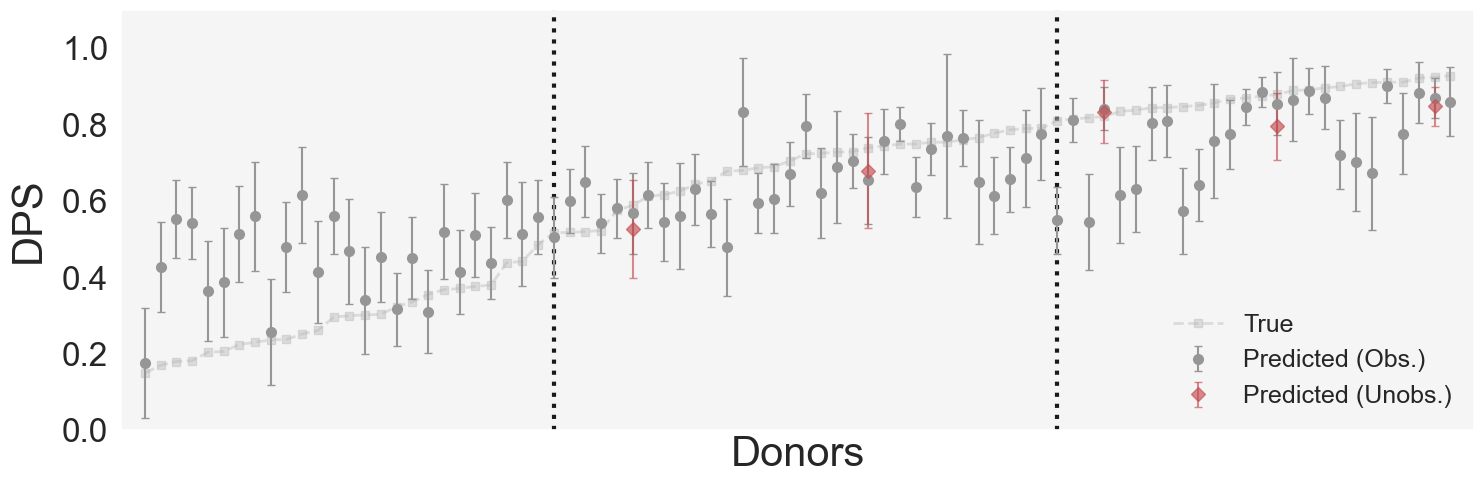

Pearsons correlation: 0.818
3.0


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

3.0 L4 IT_1
using CPU ...
Total loss: 0.016830975597258657
Total loss: 0.017571115866303444
Total loss: 0.016384308284614235
Total loss: 0.020335058332420886
Total loss: 0.016904082614928484
Total loss: 0.017219560220837593
Total loss: 0.019160496187396348
Total loss: 0.016401742701418698
Total loss: 0.017924437997862697
Total loss: 0.017803478054702282


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


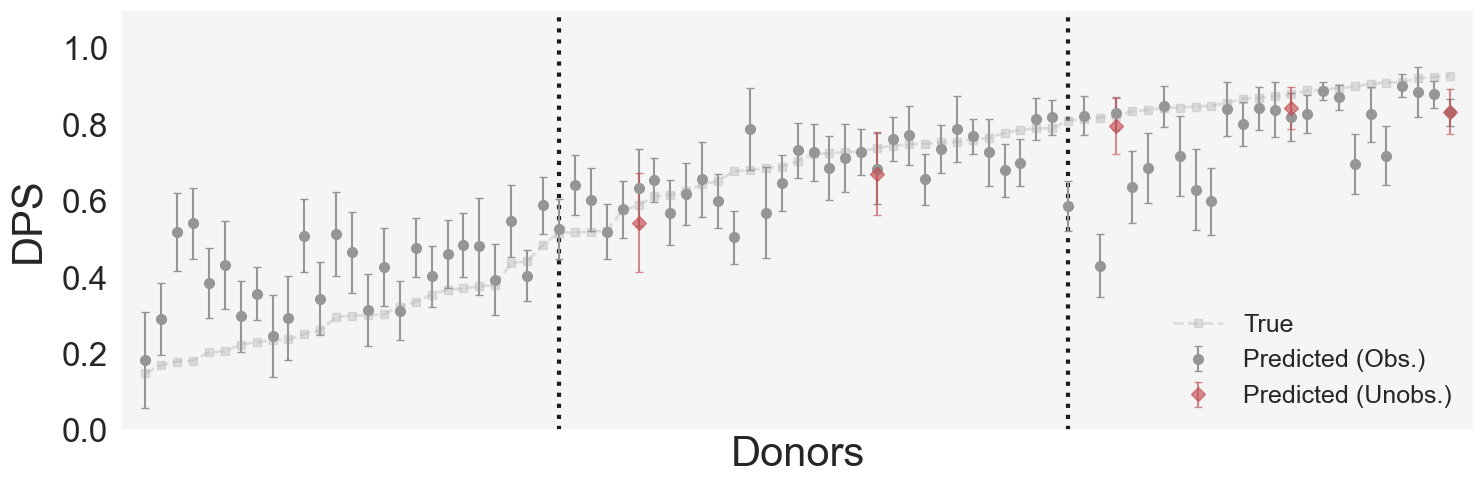

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.879
8.0
8.0 L4 IT_4
using CPU ...
Total loss: 0.0225407195976004
Total loss: 0.024644237710162997
Total loss: 0.020880463300272822
Total loss: 0.022970309597440064
Total loss: 0.023424902115948498
Total loss: 0.021665170788764954
Total loss: 0.02295949903782457
Total loss: 0.020719892694614828
Total loss: 0.023382980609312654
Total loss: 0.02314558159559965


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


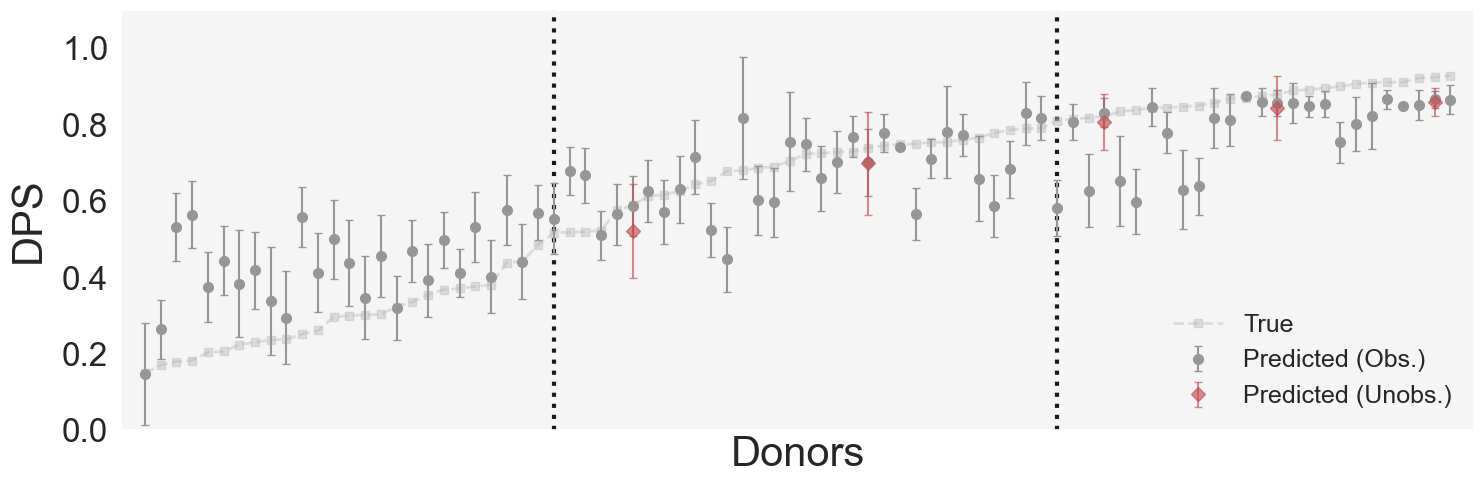

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.871
9.0
9.0 L4 IT_2
using CPU ...
Total loss: 0.015633009241095612
Total loss: 0.014965772994660906
Total loss: 0.01600540999788791
Total loss: 0.015867605032066683
Total loss: 0.01476326325376119
Total loss: 0.015649039747326503
Total loss: 0.015552979544736445
Total loss: 0.014242096837343914
Total loss: 0.015701242922140018
Total loss: 0.015257427485526673


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


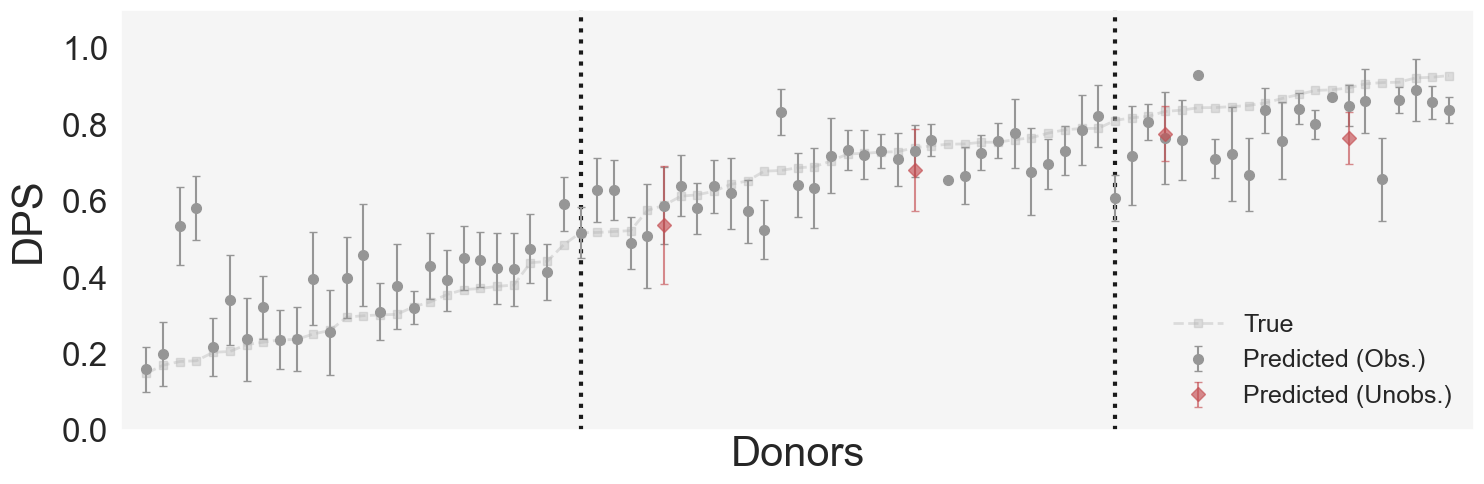

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.920
10.0
10.0 L4 IT_3
using CPU ...
Total loss: 0.013818723692869147
Total loss: 0.015242257388308644
Total loss: 0.015603167082493504
Total loss: 0.013960770176102718
Total loss: 0.01701036390538017
Total loss: 0.014974068733863533
Total loss: 0.01772797666490078
Total loss: 0.017079928889870644
Total loss: 0.016509439175327618
Total loss: 0.015863690835734207


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


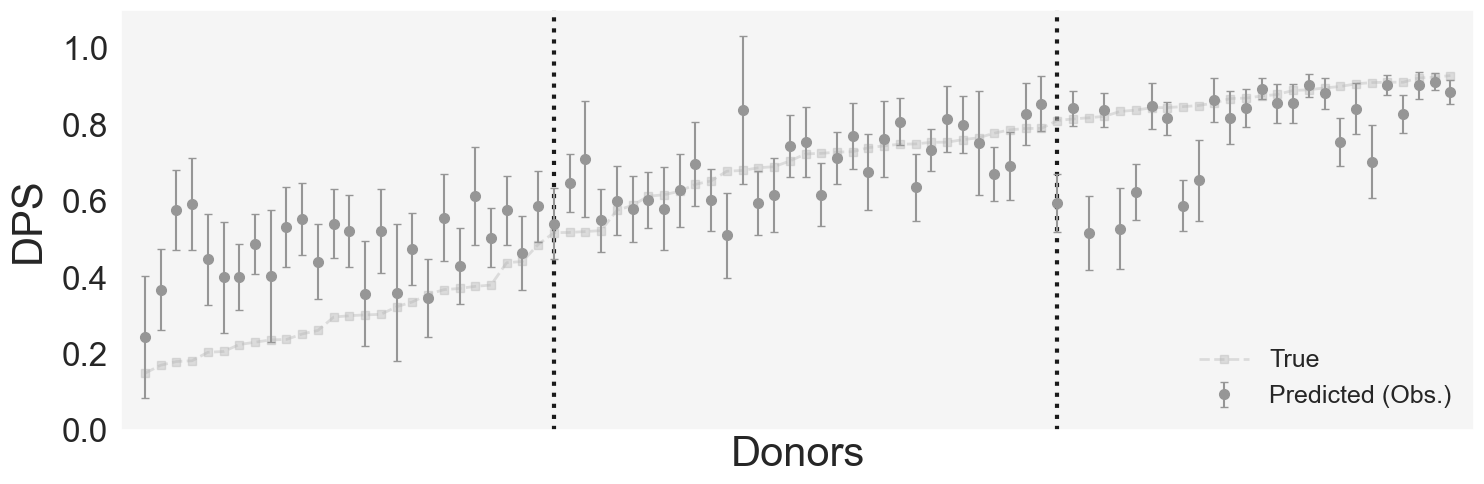

Pearsons correlation: 0.828


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [105]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['r2'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))


overall_cell_ps = []
d_mild = []
d_sever = []
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    match_ttype = uniq_ref_t[np.argmax(norm_count)]
    print(c, match_ttype)
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(meta_true_mean[meta_true_mean > 0])) # np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
        ax = plt.axes()
        ax.set_facecolor("whitesmoke")

        tmp = meta_true_mean[meta_true_mean > 0]
        mild = np.where(tmp > 0.5)[0] 
        sever = np.where(tmp > 0.8)[0] 
        d_mild.append(x[mild[0]])
        d_sever.append(x[sever[0]])
 
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        idd = [dd not in exclude_donors for dd in xtick[meta_true_mean > 0]]
        plt.vlines(d_mild[-1], 0, 1.2, linestyles ="dotted", colors ="k", linewidth=3)
        plt.vlines(d_sever[-1], 0, 1.2, linestyles ="dotted", colors ="k", linewidth=3)
        plt.plot(x, meta_true_mean[meta_true_mean > 0], linestyle='--',  linewidth=2, marker='s', markersize=6, color='#b5b5b5', alpha=0.4, label='True')
        plt.errorbar(x, meta_pred_mean[meta_true_mean > 0], yerr=meta_pred_std[meta_true_mean > 0], linestyle='None',  marker='o', fmt='#969696',  
                     markersize=7, capsize=3,  ecolor='#969696', label='Predicted (Obs.)')

        for dd in late_donors:
            i_dd = np.where(xtick == dd)[0]
            try:
                mu_pred = late_donor_dict['pred_mu'][(late_donor_dict['Ttype'] == match_ttype) & (late_donor_dict['donor'] == dd)]
                std_pred = late_donor_dict['pred_std'][(late_donor_dict['Ttype'] == match_ttype) & (late_donor_dict['donor'] == dd)]
                if c == 9:
                    ind_c = 1
                else:
                    ind_c = 0
                if dd == late_donors[0]:
                    plt.errorbar(x[i_dd], mu_pred[ind_c], yerr=std_pred[ind_c], linestyle='None',  fmt='Dr',  markersize=7, capsize=3,  ecolor='r', alpha=0.65, label='Predicted (Unobs.)')
                else:
                    plt.errorbar(x[i_dd], mu_pred[ind_c], yerr=std_pred[ind_c], linestyle='None',  fmt='Dr',  markersize=7, capsize=3,  ecolor='r', alpha=0.65)
            except:
                mu_pred = 0.
                std_pred = 0.

            
        for dd in middle_donors:
            i_dd = np.where(xtick == dd)[0]
            try:
                mu_pred = middle_donor_dict['pred_mu'][(middle_donor_dict['Ttype'] == match_ttype) & (middle_donor_dict['donor'] == dd)]
                std_pred = middle_donor_dict['pred_std'][(middle_donor_dict['Ttype'] == match_ttype) & (middle_donor_dict['donor'] == dd)]
                if c == 9:
                    ind_c = 1
                else:
                    ind_c = 0
                plt.errorbar(x[i_dd], mu_pred[ind_c], yerr=std_pred[ind_c], linestyle='None',  fmt='Dr',  markersize=7, capsize=3,  ecolor='r', alpha=0.65)
            except:
                mu_pred = 0.
                std_pred = 0.

        plt.grid(b=None)
        plt.xticks([]) #(x, xtick, rotation=90, fontsize=8)
        plt.yticks(fontsize=24)
        plt.xlabel('Donors', fontsize=30)
        plt.ylabel('DPS',fontsize=30, labelpad=10)
        plt.xlim([-1.5, np.max(x)+1.5])
        plt.ylim([0., 1.1])
        plt.legend(fontsize=18, loc='lower right', frameon=False)
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/latest_qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = match_ttype
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))


In [124]:
ytick = [br[6:] for br in data['braak']]
np.unique( data['braak'])

array(['Braak 0', 'Braak II', 'Braak III', 'Braak IV', 'Braak V',
       'Braak VI'], dtype='<U9')

1.0 1
using CPU ...
Total loss: 0.03077962083209838
Total loss: 0.03229243973536151
Total loss: 0.010683359547069162
Total loss: 0.032786868745461106
Total loss: 0.03127038593603564
Total loss: 0.011092614103940182
Total loss: 0.0321872463848974
Total loss: 0.03422344326307731
Total loss: 0.033046493489694385
Total loss: 0.010398420966729256


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:162: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


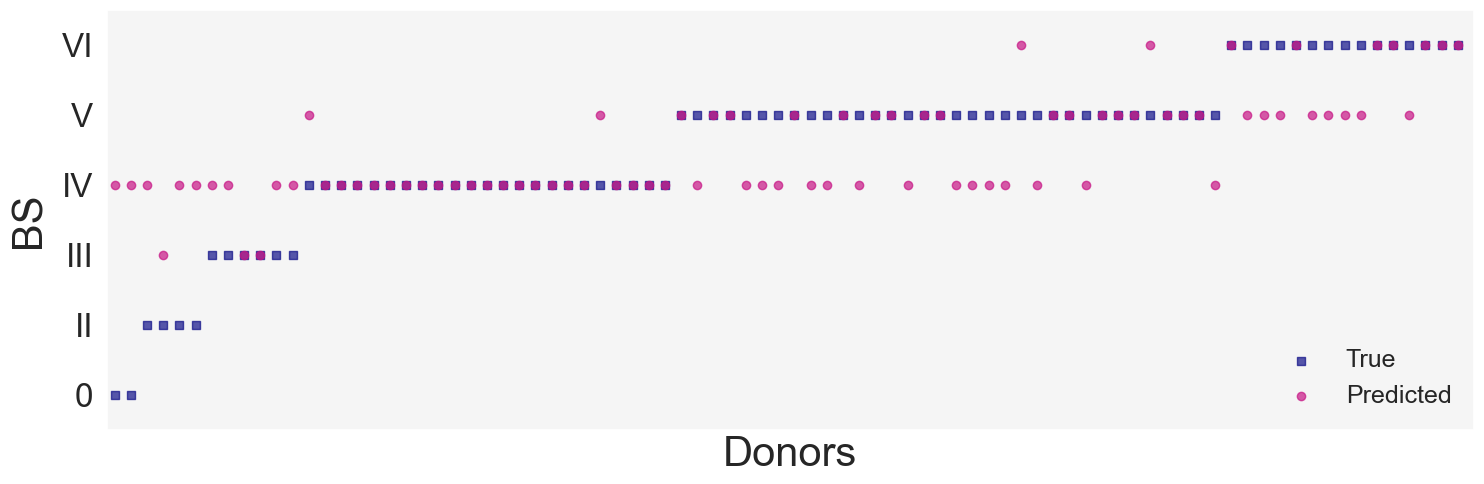

Pearsons correlation: 0.665
3.0 0
using CPU ...
Total loss: 0.019581531174480915


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.0202929622028023
Total loss: 0.019004571484401822
Total loss: 0.018026612582616508
Total loss: 0.021503463620319963
Total loss: 0.02025868312921375
Total loss: 0.02003274398157373
Total loss: 0.019079399411566556
Total loss: 0.017764070420525968
Total loss: 0.01908443565480411


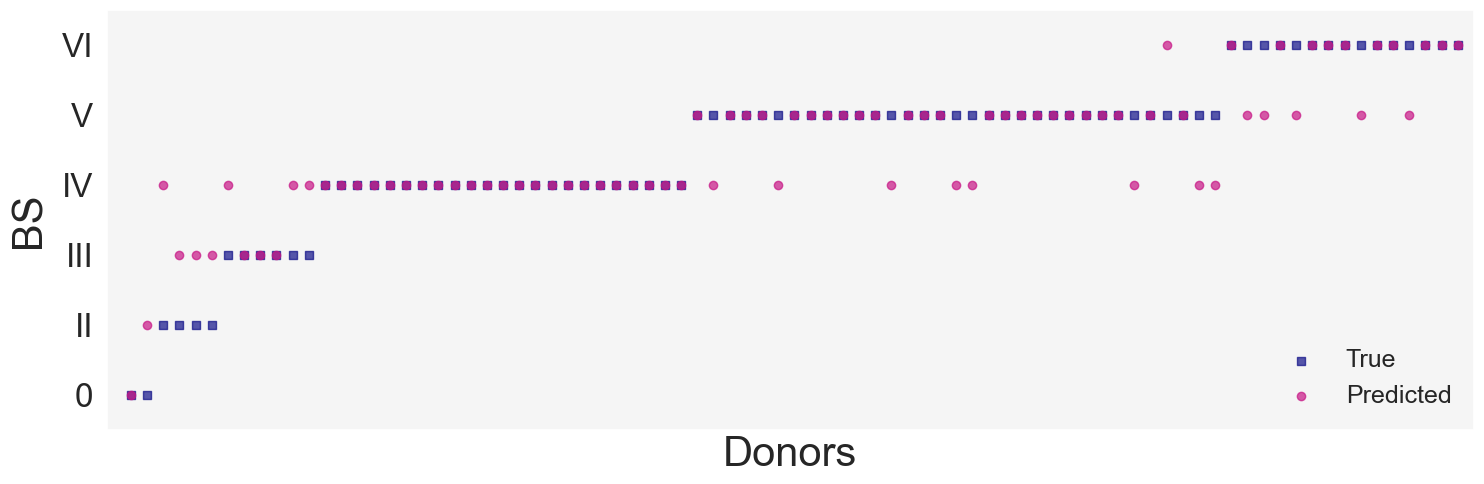

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.883
8.0 3
using CPU ...
Total loss: 0.018985521447445666
Total loss: 0.020209921656974723
Total loss: 0.021409801074436734
Total loss: 0.01994750622127737
Total loss: 0.02425382805189916
Total loss: 0.023705549138997282
Total loss: 0.019573919075940336
Total loss: 0.023347852485520498
Total loss: 0.021749835461378098
Total loss: 0.022497797650950297


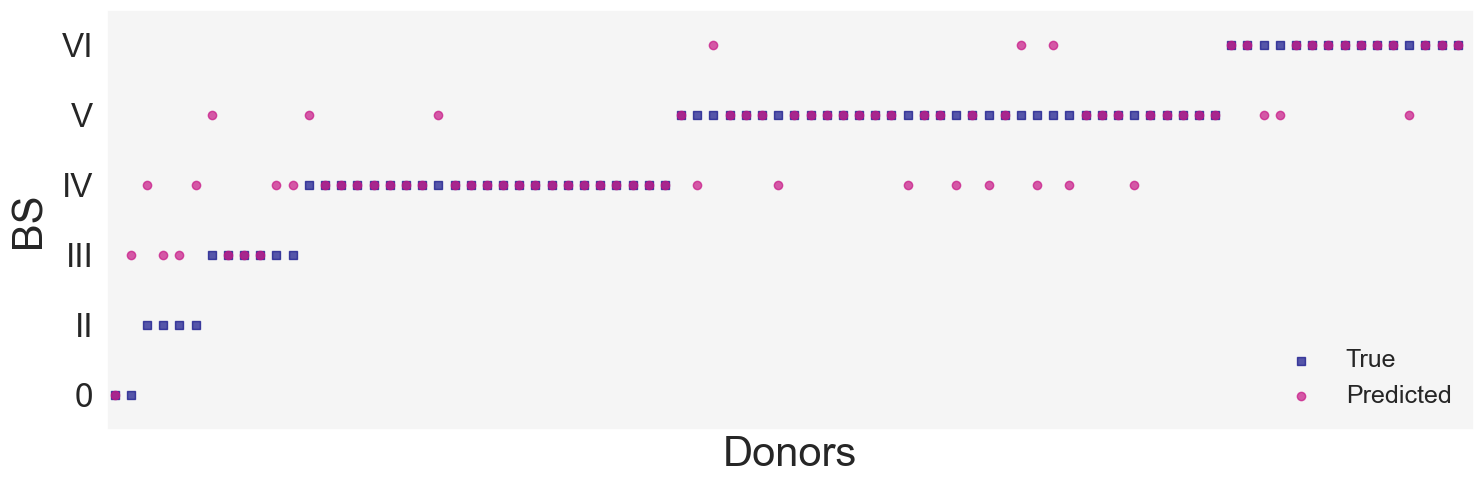

Pearsons correlation: 0.824
9.0 1
using CPU ...
Total loss: 0.013118859438691288
Total loss: 0.013429443218878337
Total loss: 0.013035300154505032
Total loss: 0.013872310689683738
Total loss: 0.013122824120468326
Total loss: 0.012709356071094849
Total loss: 0.01220557389647833
Total loss: 0.014233217258671564
Total loss: 0.013698658581623542
Total loss: 0.013792204308889009


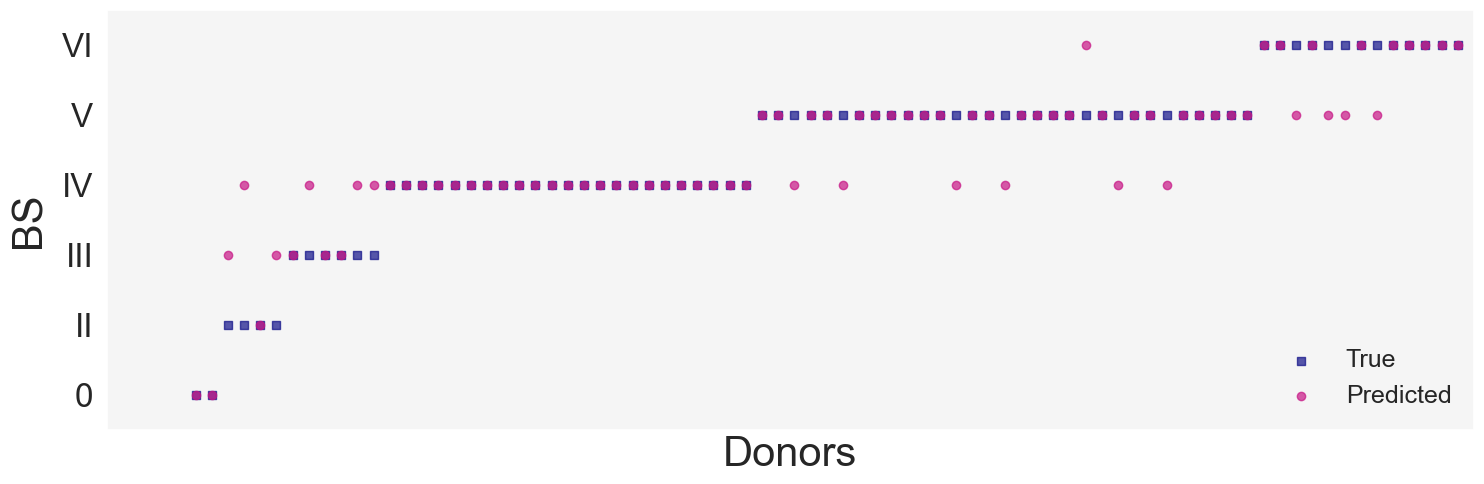

Pearsons correlation: 0.901
10.0 2
using CPU ...
Total loss: 0.02917801309376955
Total loss: 0.02427232265472412
Total loss: 0.019524589646607637
Total loss: 0.01826716773211956
Total loss: 0.01856946386396885
Total loss: 0.018026338890194893
Total loss: 0.02280085813254118
Total loss: 0.027133261784911156
Total loss: 0.02262592501938343
Total loss: 0.026429898105561733


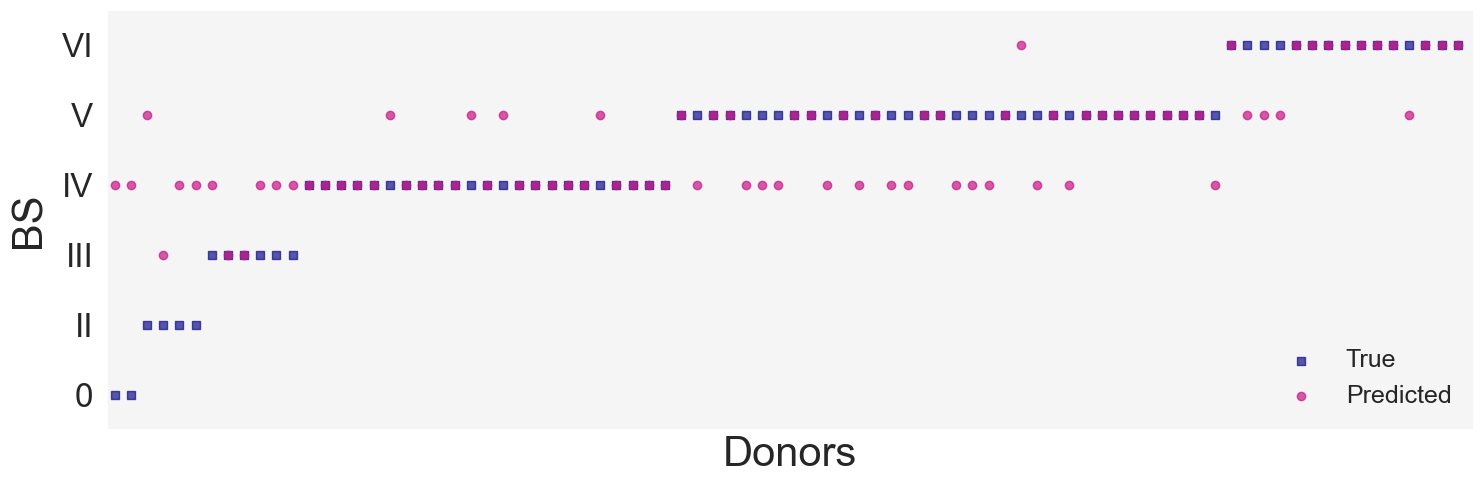

Pearsons correlation: 0.660


In [106]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'
m_ind = []
df_braak = pd.DataFrame()
df_braak['c'] = np.zeros(len(cat))
df_braak['superype'] = np.zeros(len(cat))
df_braak['pearson_corr'] = np.zeros(len(cat))
df_braak['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        ax = plt.axes()
        ax.set_facecolor("whitesmoke")
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', marker='s', alpha=0.65, label='True')
        plt.scatter(x, meta_pred_score[m_indx], color='MediumVioletRed', marker='o', alpha=0.7, label='Predicted')

        ytick = [br[6:] for br in data['braak']]
        plt.yticks(np.unique(data[metadata]), np.unique(ytick), fontsize=24)
        plt.grid(b=None)
        plt.xticks([]) #(x, xtick, rotation=90, fontsize=8)
        plt.xlabel('Donors', fontsize=30)
        plt.ylabel('BS',fontsize=30, labelpad=10)
        plt.legend(fontsize=18, loc='lower right', frameon=False)
        plt.tight_layout()
        # plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        # plt.legend()
        # plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        # plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_braak['c'][i_c] = int(c)
        df_braak['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_braak['pearson_corr'][i_c] = corr
        df_braak['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [88]:
df_braak

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.665156,0.029524
1,3.0,L4 IT_1,0.883473,0.012048
2,8.0,L4 IT_4,0.824281,0.017143
3,9.0,L4 IT_2,0.901314,0.010127
4,10.0,L4 IT_3,0.659607,0.030000


1.0 1
using CPU ...
Total loss: 0.03077962083209838
Total loss: 0.03229243973536151
Total loss: 0.010683359547069162
Total loss: 0.032786868745461106
Total loss: 0.03127038593603564
Total loss: 0.011092614103940182
Total loss: 0.0321872463848974
Total loss: 0.03422344326307731
Total loss: 0.033046493489694385
Total loss: 0.010398420966729256


NameError: name 'tick_marks' is not defined

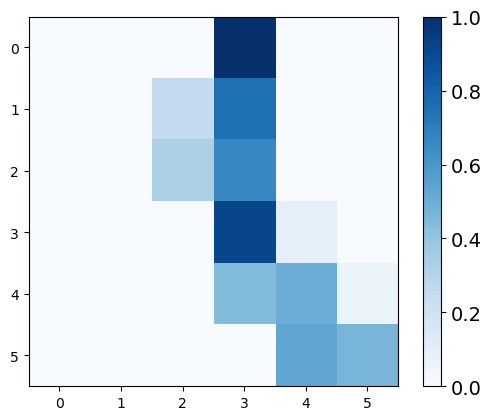

In [15]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import pandas as pd
import itertools

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'
m_ind = []
bs_acc = []

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]

        y_true = (y_true * 10).astype(int)
        y_pred = (y_pred * 10).astype(int)
    
        cmm = confusion_matrix(y_true , y_pred, normalize='true')
        bs_acc.append(balanced_accuracy_score(y_true, y_pred))
        
        plt.imshow(cmm, interpolation='nearest', cmap=plt.cm.Blues, vmax=1., vmin=0.)
        cbar = plt.colorbar()
        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(14)
        ytick = [br[6:] for br in data['braak']]
        plt.xticks(tick_marks, np.unique(ytick), fontsize=16)
        plt.yticks(tick_marks, np.unique(ytick), fontsize=16)

        thresh = 0.5
        for i, j in itertools.product(range(cmm.shape[0]), range(cmm.shape[1])):
            if cmm[i, j] > 0.05:
                plt.text(j, i, format(round(cmm[i, j], 1), '.1f'), horizontalalignment="center", color="white" if cmm[i, j] > thresh else "black")

        plt.ylabel('BS', fontsize=24, labelpad=10)
        plt.xlabel('Predicted BS', fontsize=24, labelpad=10)
        plt.grid(b=None)
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
#         plt.savefig(saving_folder + '/cm_braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        

1.0 1
using CPU ...
Total loss: 0.03642462788368849
Total loss: 0.034648495020947474
Total loss: 0.03604599485612091
Total loss: 0.049921949736445266
Total loss: 0.032931019052150935
Total loss: 0.04934377036988735
Total loss: 0.03493813655393965
Total loss: 0.0343079004327164
Total loss: 0.03292098325019812
Total loss: 0.051917169243097305


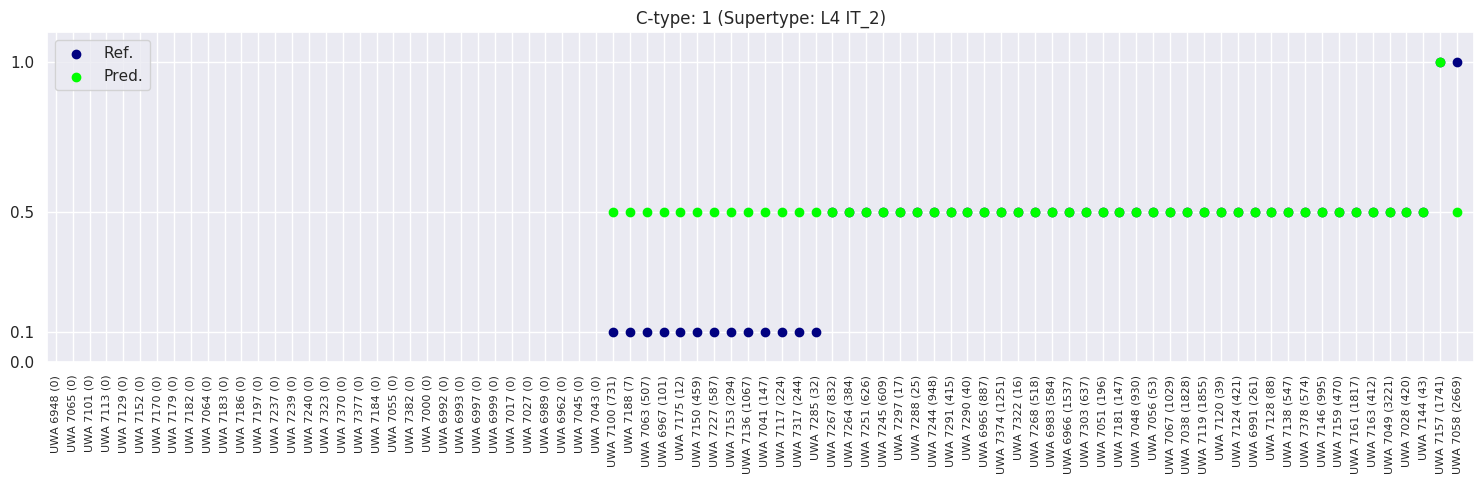

Pearsons correlation: 0.393
3.0 0
using CPU ...
Total loss: 0.04931824095547199


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.049934493750333785
Total loss: 0.050102772563695906
Total loss: 0.04491268210113049
Total loss: 0.05383666642010212
Total loss: 0.04902336895465851
Total loss: 0.05527726262807846
Total loss: 0.04700905121862888
Total loss: 0.047027040272951126
Total loss: 0.05236121229827404


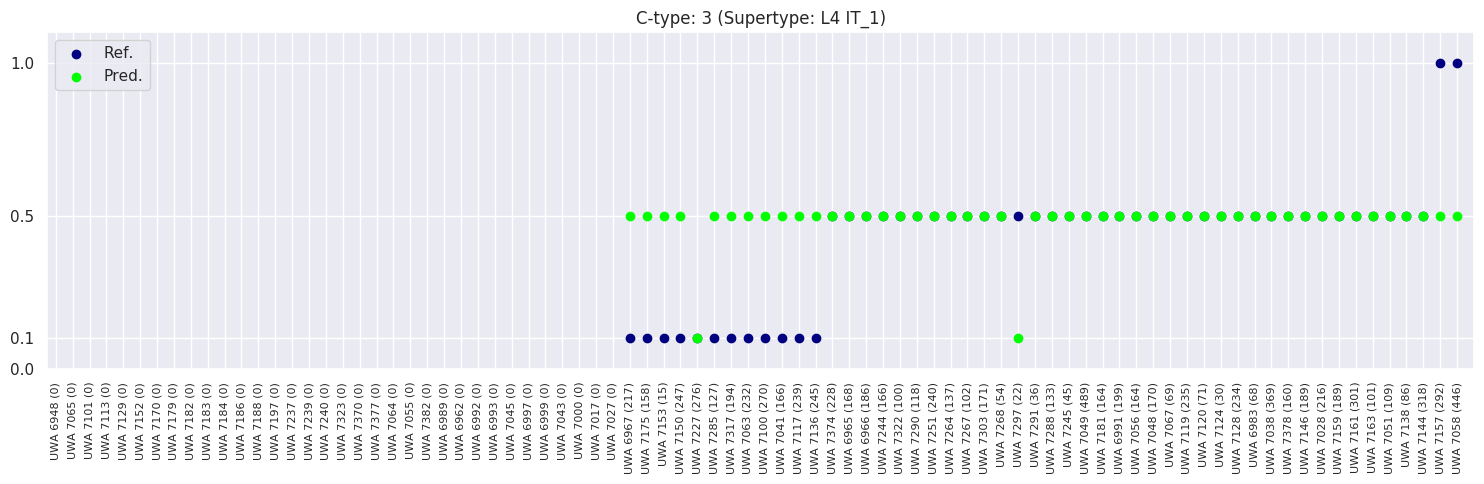

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.123
8.0 3
using CPU ...
Total loss: 0.04161783028393984
Total loss: 0.04155115969479084
Total loss: 0.0409941328689456
Total loss: 0.04397499095648527
Total loss: 0.04550286661833525
Total loss: 0.038069895934313536
Total loss: 0.043292003218084574
Total loss: 0.04140131827443838
Total loss: 0.04261911101639271
Total loss: 0.040989638306200504


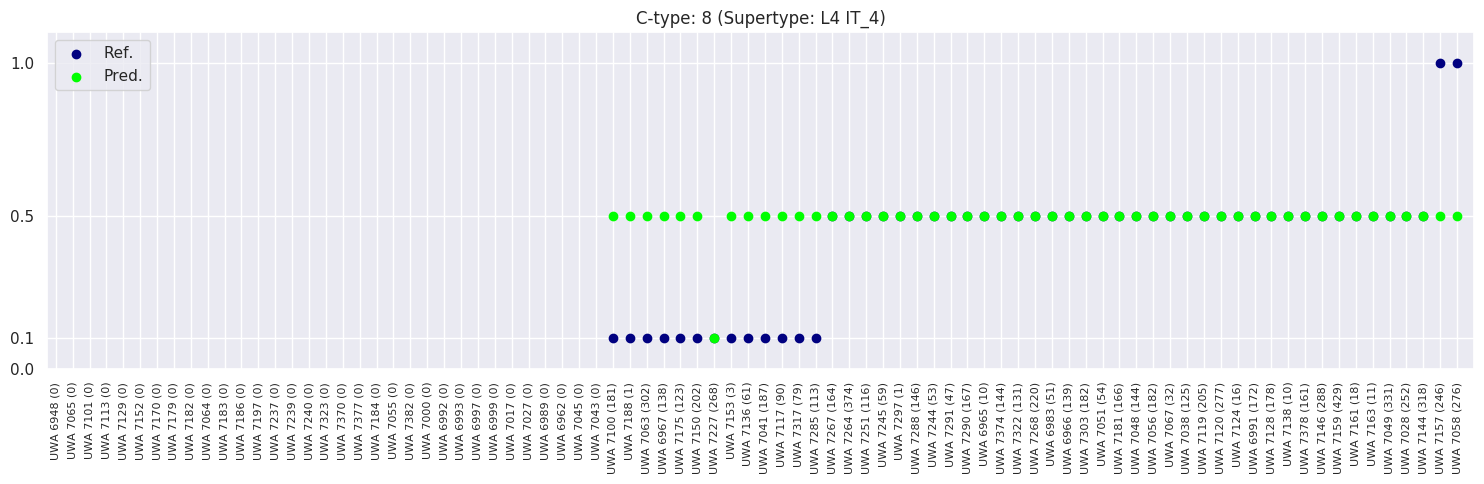

Pearsons correlation: 0.215
9.0 0
using CPU ...
Total loss: 0.030179838940966874
Total loss: 0.03304343612398952
Total loss: 0.030892523645889014
Total loss: 0.029555399960372597
Total loss: 0.031629482633434236
Total loss: 0.03223358583636582
Total loss: 0.02990896435221657
Total loss: 0.027785822981968522
Total loss: 0.030558909405954182
Total loss: 0.032281702500768006


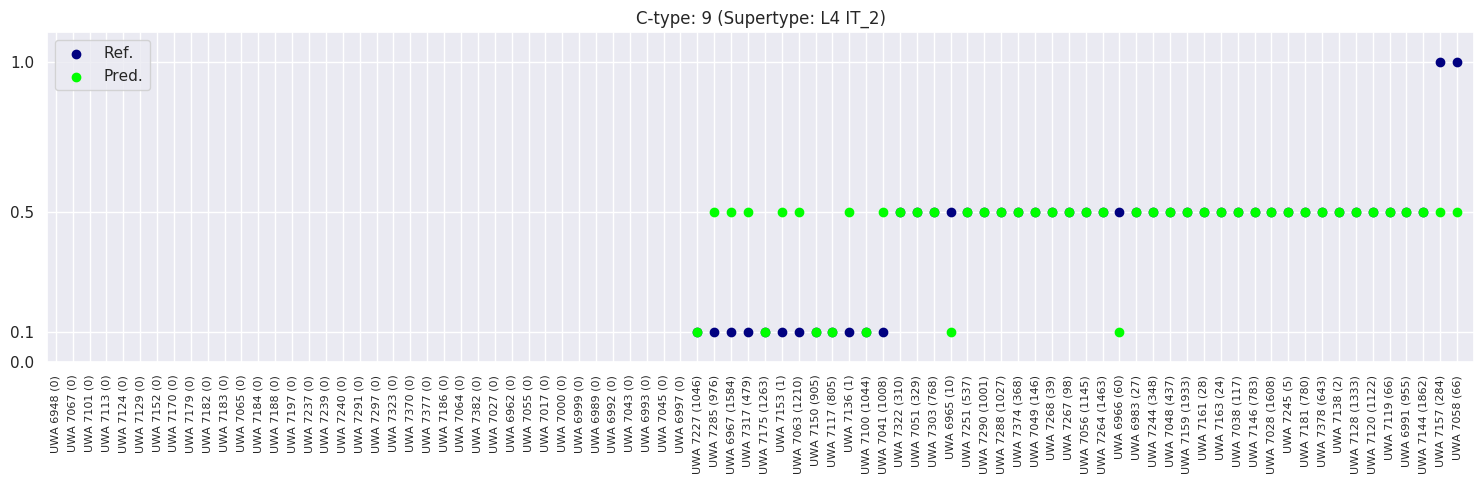

Pearsons correlation: 0.402
10.0 2
using CPU ...
Total loss: 0.03452669829130173
Total loss: 0.035407401621341705
Total loss: 0.0468275211751461
Total loss: 0.042548928409814835
Total loss: 0.0479869544506073
Total loss: 0.0474788174033165
Total loss: 0.03611355647444725
Total loss: 0.03617481887340546
Total loss: 0.037952080368995667
Total loss: 0.03934989869594574


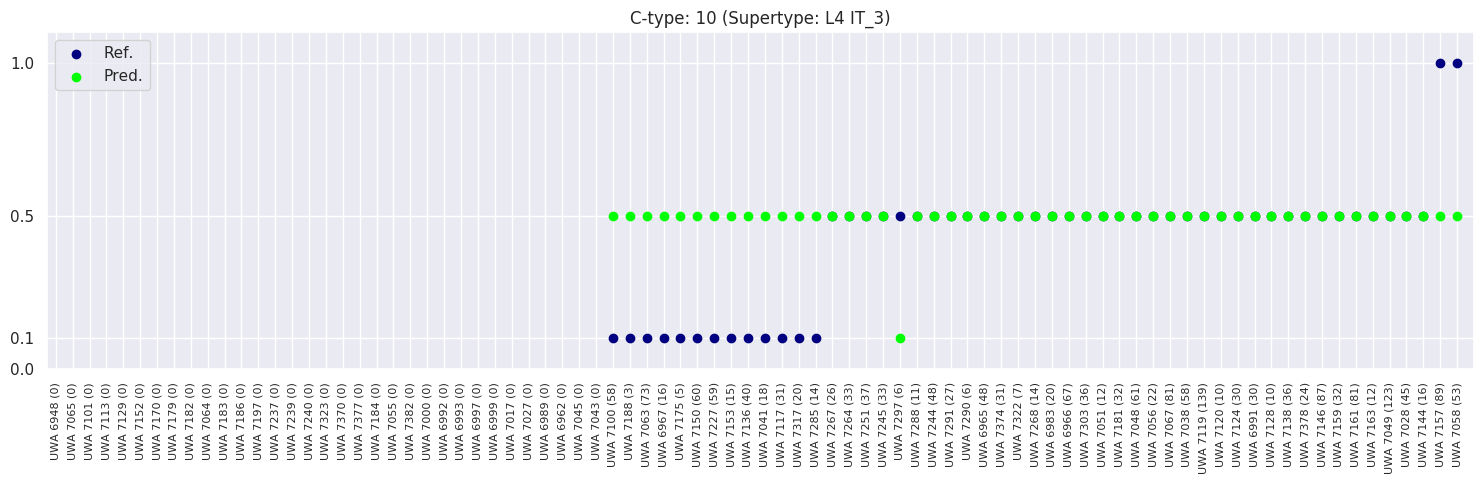

Pearsons correlation: -0.056


In [62]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

seed = 100
kfold = 10
metadata = 'caascore'

m_ind = []
df_caa = pd.DataFrame()
df_caa['c'] = np.zeros(len(cat))
df_caa['superype'] = np.zeros(len(cat))
df_caa['pearson_corr'] = np.zeros(len(cat))
df_caa['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    

arm = 0
if metadata == 'caa':
    indx = np.where(data[metadata] > 0)[0]
else:
    indx = np.arange(len(data[metadata]))

state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, indx]
s_idx = outcome['sample_id'][-1].astype(int)[indx]
categories = np.unique(pred_type)
eval_dict = [[None] for i in categories]

supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
super_type = data['supertype_scANVI'][s_idx]
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data[metadata]))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/caascore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_caa['c'][i_c] = int(c)
        df_caa['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_caa['pearson_corr'][i_c] = corr
        df_caa['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [63]:
df_caa

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.393490,0.045686
1,3.0,L4 IT_1,0.122600,0.048400
2,8.0,L4 IT_4,0.214631,0.047451
3,9.0,L4 IT_2,0.402142,0.042174
4,10.0,L4 IT_3,-0.055645,0.053725


1.0 1
using CPU ...
Total loss: 0.05231673812626728
Total loss: 0.018329826042255654
Total loss: 0.05613104473533375
Total loss: 0.017137796950659583
Total loss: 0.053198904996471744
Total loss: 0.01964075171105963
Total loss: 0.01913126836630649
Total loss: 0.06011834743964885
Total loss: 0.05338780430611223
Total loss: 0.05021347256011462


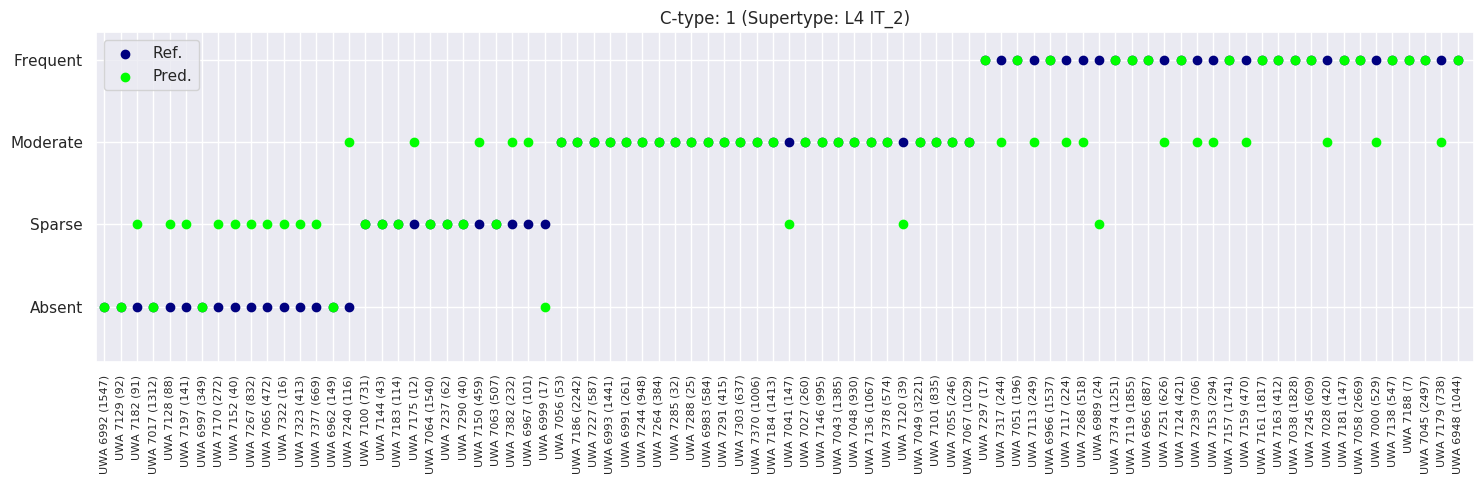

Pearsons correlation: 0.810
3.0 0
using CPU ...
Total loss: 0.036304698092862964


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.03535743011161685
Total loss: 0.030475233448669314
Total loss: 0.032789248740300536
Total loss: 0.0350010939873755
Total loss: 0.035831184359267354
Total loss: 0.03377846139483154
Total loss: 0.03409330639988184
Total loss: 0.031702441396191716
Total loss: 0.03362406091764569


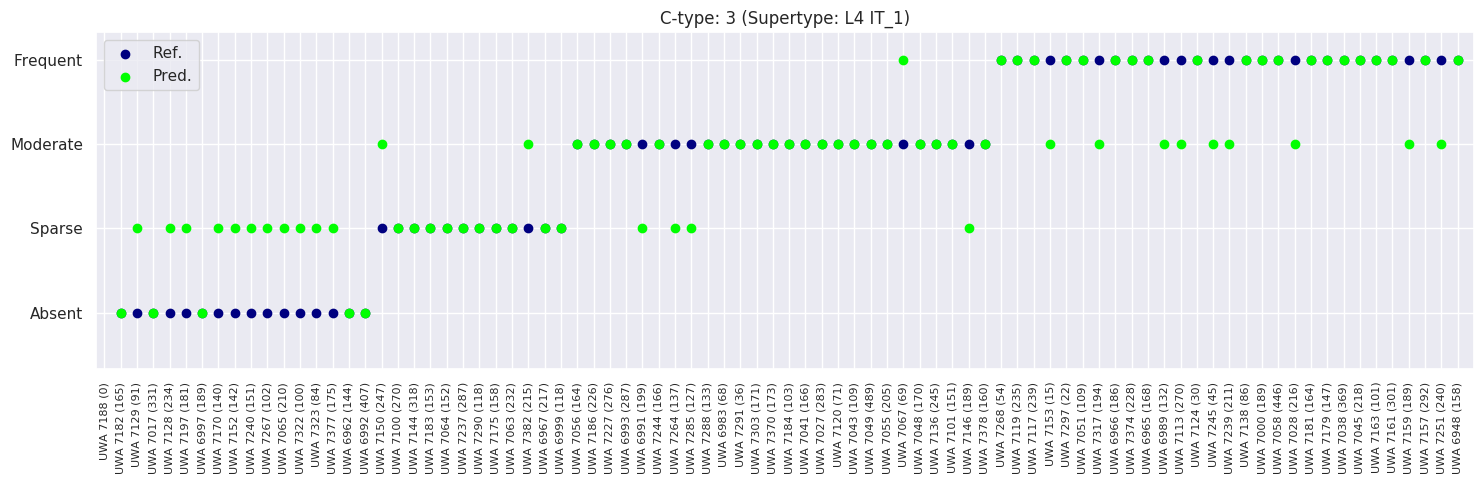

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.861
8.0 3
using CPU ...
Total loss: 0.044443387006010325
Total loss: 0.04792601029787745
Total loss: 0.04356784000992775
Total loss: 0.04408260754176548
Total loss: 0.045010367674486976
Total loss: 0.043281826323696544
Total loss: 0.043650618089096885
Total loss: 0.04989128905747618
Total loss: 0.04234194170151438
Total loss: 0.045159141932215006


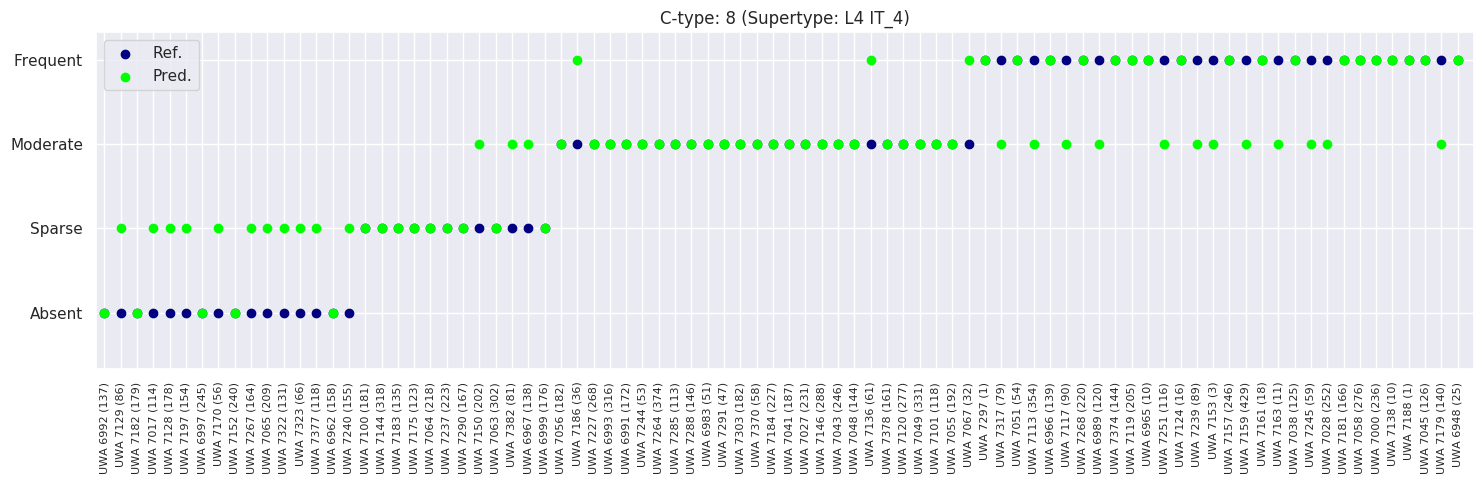

Pearsons correlation: 0.856
9.0 1
using CPU ...
Total loss: 0.028581902584327117
Total loss: 0.03163576774698283
Total loss: 0.030308469398213283
Total loss: 0.032235853922819455
Total loss: 0.03124652254129095
Total loss: 0.030472765460477343
Total loss: 0.028339627531490157
Total loss: 0.028735201539737836
Total loss: 0.029776958815221275
Total loss: 0.031065106026030014


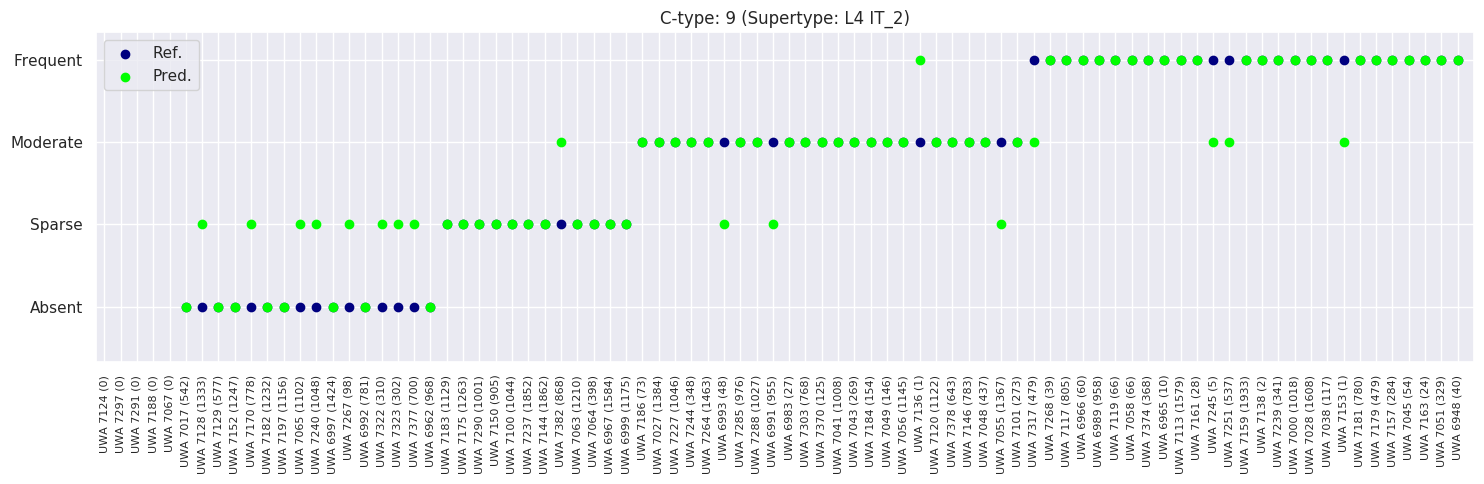

Pearsons correlation: 0.912
10.0 2
using CPU ...
Total loss: 0.039511945098638535
Total loss: 0.044105274602770805
Total loss: 0.0479377843439579
Total loss: 0.0369760449975729
Total loss: 0.04118957370519638
Total loss: 0.04305858351290226
Total loss: 0.03696299344301224
Total loss: 0.04261637665331364
Total loss: 0.04489818029105663
Total loss: 0.04639460705220699


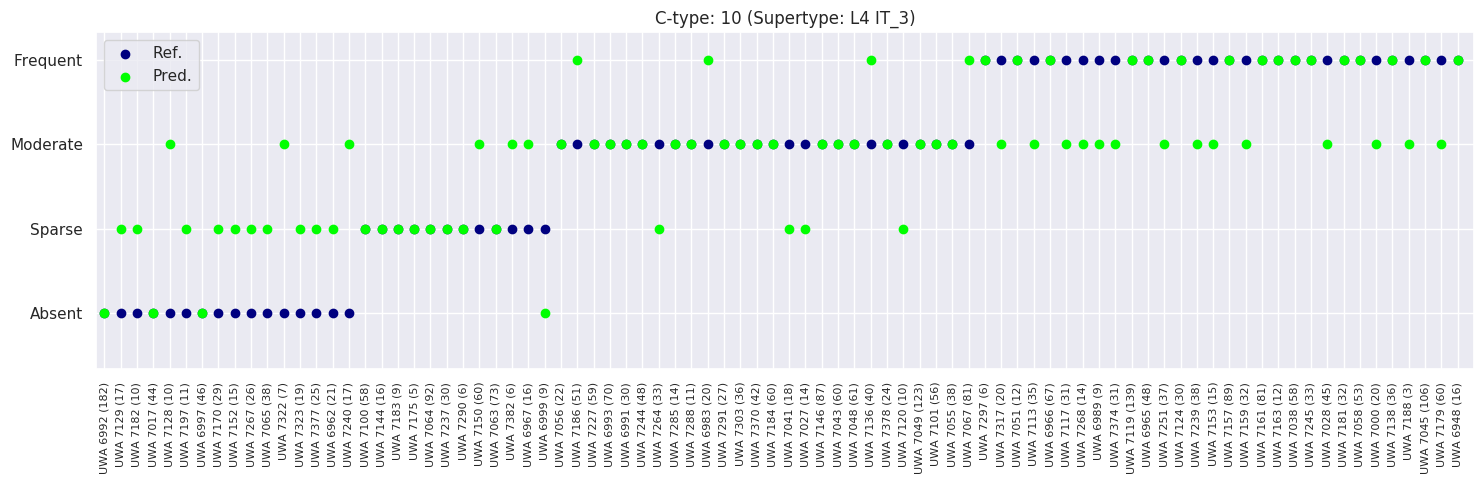

Pearsons correlation: 0.734


In [64]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cscore'

m_ind = []
df_cs = pd.DataFrame()
df_cs['c'] = np.zeros(len(cat))
df_cs['superype'] = np.zeros(len(cat))
df_cs['pearson_corr'] = np.zeros(len(cat))
df_cs['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['Absent', 'Sparse','Moderate', 'Frequent'])
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cscore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_cs['c'][i_c] = int(c)
        df_cs['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs['pearson_corr'][i_c] = corr
        df_cs['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [65]:
df_cs

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.809518,0.038571
1,3.0,L4 IT_1,0.861037,0.029277
2,8.0,L4 IT_4,0.855617,0.031071
3,9.0,L4 IT_2,0.911934,0.019367
4,10.0,L4 IT_3,0.734066,0.051429


1.0 1
using CPU ...
Total loss: 0.04512772002739699
Total loss: 0.16938516098473752
Total loss: 0.1905767914972135
Total loss: 0.18765383958816528
Total loss: 0.17379081887858255
Total loss: 0.19311882395829474
Total loss: 0.04673256414493413
Total loss: 0.18624306230672769
Total loss: 0.04157032756276229
Total loss: 0.04092585206776026


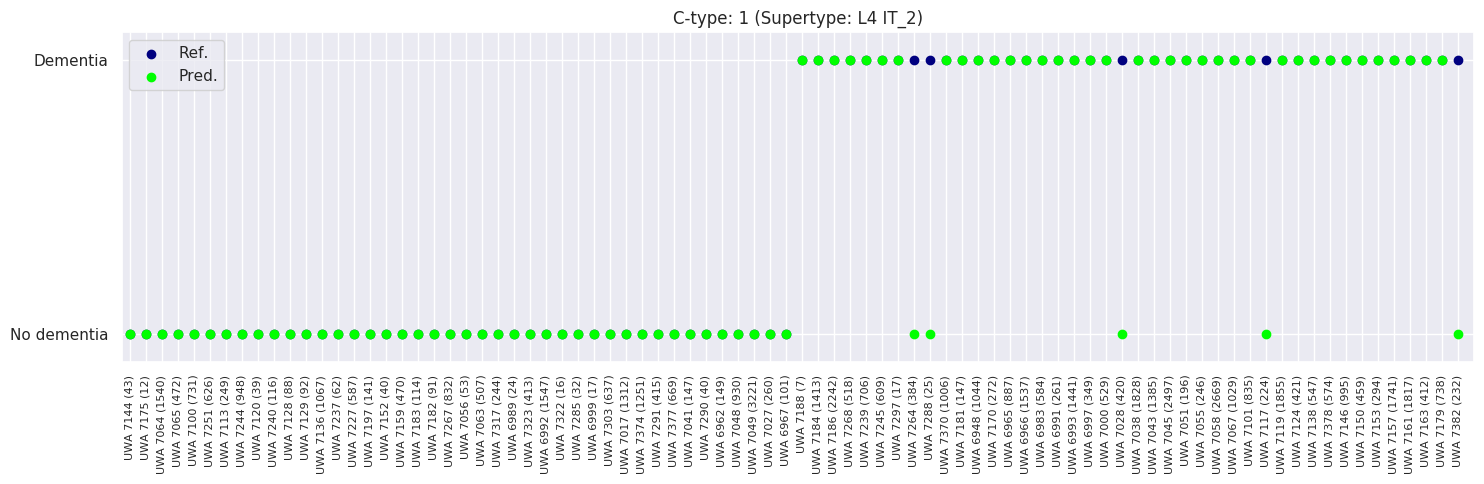

Pearsons correlation: 0.887
3.0 0
using CPU ...


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total loss: 0.093136933632195
Total loss: 0.09147648327052593
Total loss: 0.08934040879830718
Total loss: 0.08274655137211084
Total loss: 0.08253879519179463
Total loss: 0.08767738286405802
Total loss: 0.07891387213021517
Total loss: 0.08514797827228904
Total loss: 0.07592178042978048
Total loss: 0.07907076273113489


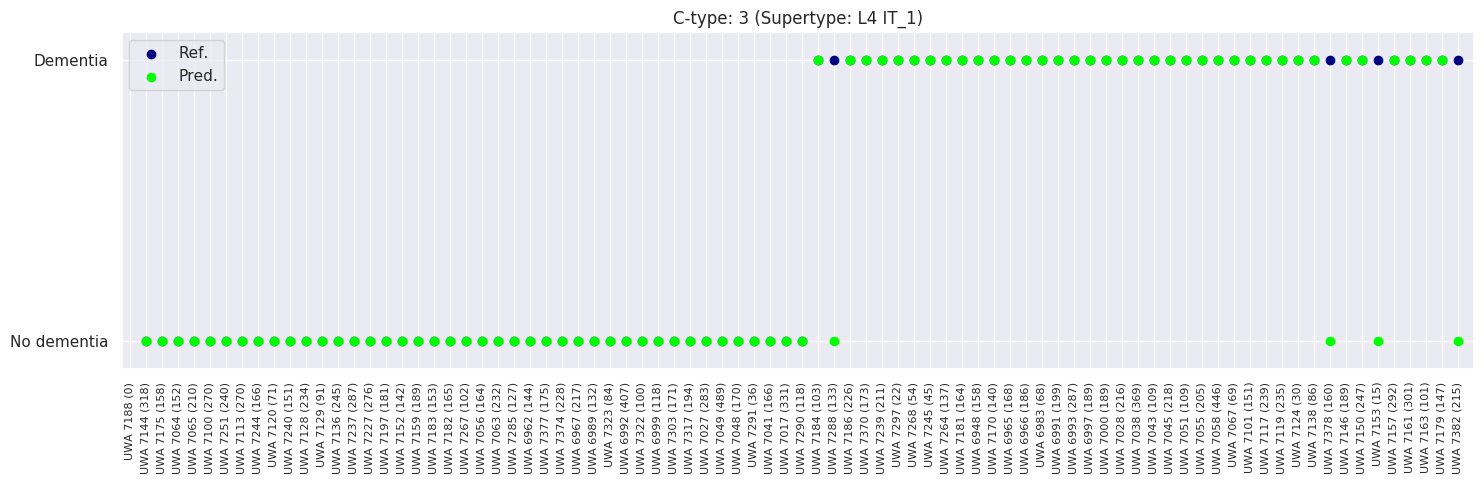

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.908
8.0 3
using CPU ...
Total loss: 0.10020594937460763
Total loss: 0.112496018409729
Total loss: 0.10057709366083145
Total loss: 0.10916391440800258
Total loss: 0.11476441259895052
Total loss: 0.1046063101717404
Total loss: 0.11142093049628395
Total loss: 0.11415082109825951
Total loss: 0.09932832952056612
Total loss: 0.11615482504878726


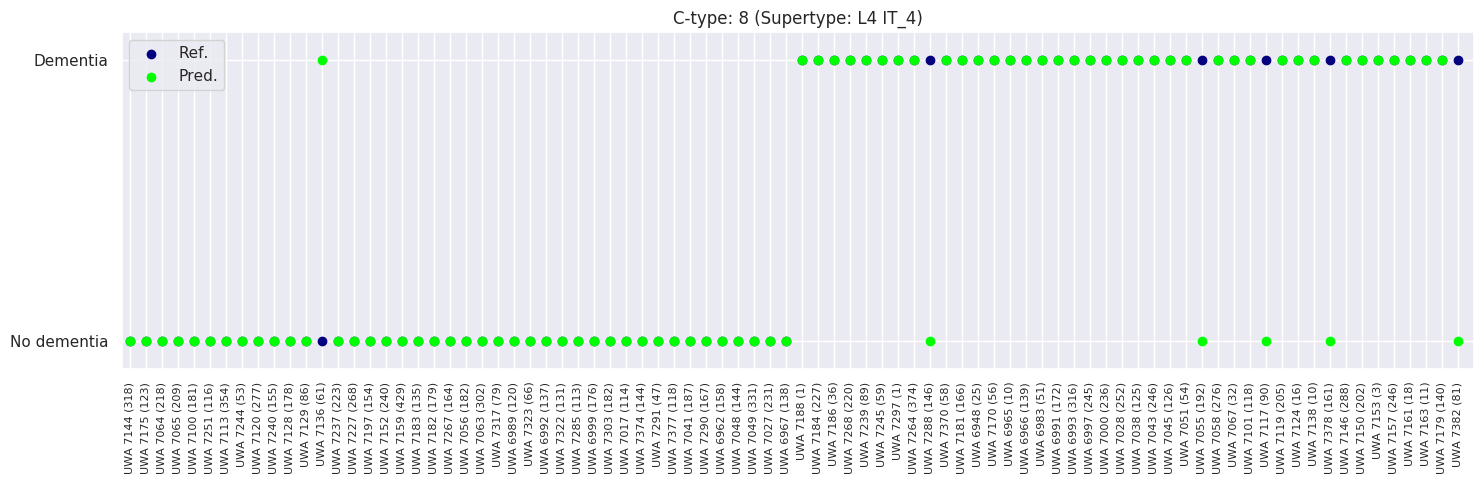

Pearsons correlation: 0.861
9.0 1
using CPU ...
Total loss: 0.05992614835434194
Total loss: 0.06693452057827796
Total loss: 0.06052399210498801
Total loss: 0.061357000921686576
Total loss: 0.059338050977593024
Total loss: 0.058822674194483886
Total loss: 0.06344010522921703
Total loss: 0.06884679464357239
Total loss: 0.06264740556278932
Total loss: 0.0617272002356393


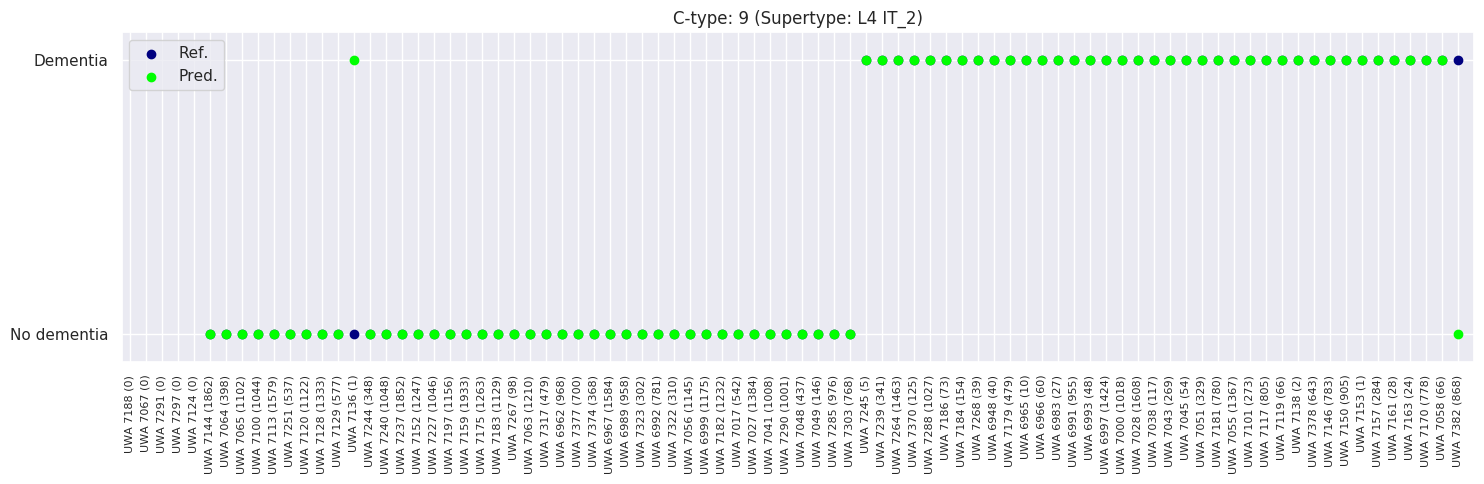

Pearsons correlation: 0.949
10.0 2
using CPU ...
Total loss: 0.10305369272828102
Total loss: 0.09347059950232506
Total loss: 0.08743083104491234
Total loss: 0.10434979945421219
Total loss: 0.1088901087641716
Total loss: 0.12271629273891449
Total loss: 0.09339801594614983
Total loss: 0.07167478278279305
Total loss: 0.10756117850542068
Total loss: 0.08034872636198997


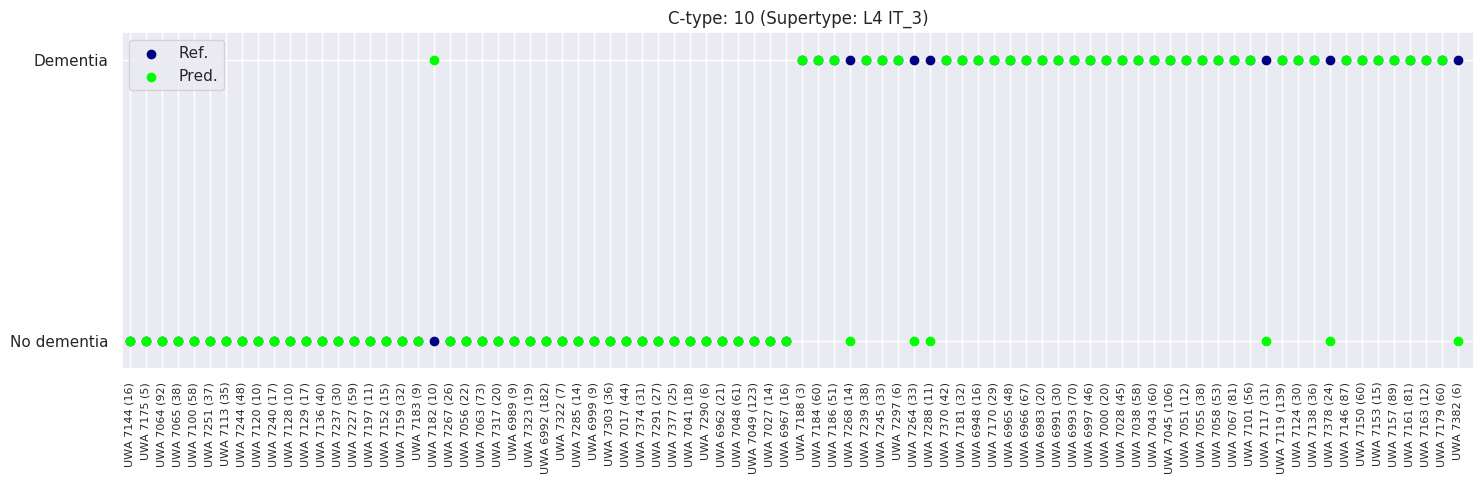

Pearsons correlation: 0.839


In [66]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold


arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cognitive_status_binary'

m_ind = []
df_cs_binary = pd.DataFrame()
df_cs_binary['c'] = np.zeros(len(cat))
df_cs_binary['superype'] = np.zeros(len(cat))
df_cs_binary['pearson_corr'] = np.zeros(len(cat))
df_cs_binary['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False


for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)
                    

        meta_pred_score = np.array(meta_pred_score)
        color = np.array(color)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['No dementia', 'Dementia'])
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cs_binary_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_cs_binary['c'][i_c] = int(c)
        df_cs_binary['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs_binary['pearson_corr'][i_c] = corr
        df_cs_binary['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [67]:
df_cs_binary

,c,superype,pearson_corr,mse
0,1.0,L4 IT_2,0.887262,0.059524
1,3.0,L4 IT_1,0.907726,0.048193
2,8.0,L4 IT_4,0.861057,0.071429
3,9.0,L4 IT_2,0.949294,0.025316
4,10.0,L4 IT_3,0.839302,0.083333


In [37]:
import scanpy as sc

In [51]:
np.unique(pred_type)

array([ 1.,  3.,  8.,  9., 10.])

In [44]:
pred_type.shape

(152052,)

In [46]:
import umap
reducer = umap.UMAP()
x_umap = reducer.fit_transform(data['log1p'])

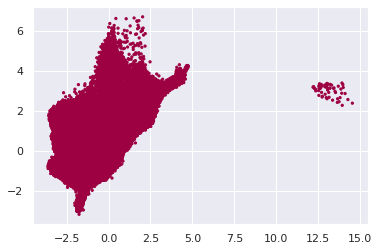

In [49]:
IT_2 = np.where(data['label']==2)[0]
plt.scatter(x_umap[IT_2, 0], x_umap[IT_2, 1], c=data['label'][IT_2], cmap='Spectral', s=5)

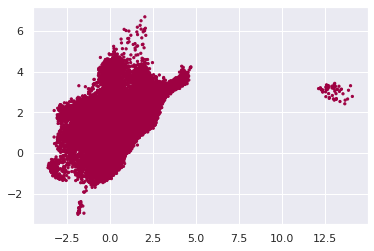

In [55]:
IT_2 = np.where(pred_type==1)[0]
plt.scatter(x_umap[IT_2, 0], x_umap[IT_2, 1], c=pred_type[IT_2], cmap='Spectral', s=5)

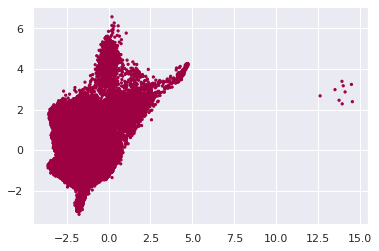

In [56]:
IT_2 = np.where(pred_type==9)[0]
plt.scatter(x_umap[IT_2, 0], x_umap[IT_2, 1], c=pred_type[IT_2], cmap='Spectral', s=5)

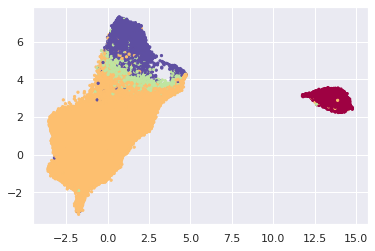

In [47]:
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=data['label'], cmap='Spectral', s=5)

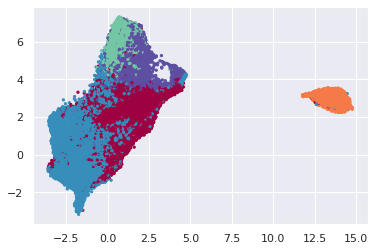

In [48]:
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=pred_type, cmap='Spectral', s=5)

In [68]:
data.keys()


dict_keys(['barcode', 'sample_id', 'donor_name', 'external_donor_name', 'class', 'subclass', 'subclass_color', 'supertype', 'cluster', 'cluster_color', 'class_scANVI', 'subclass_scANVI', 'supertype_scANVI', 'supertype_scANVI_leiden', 'scvi_labels', 'age', 'sex', 'age_at_death', 'thal', 'braak', 'cscore', 'caascore', 'cognitive_status', 'age_onsetcs', 'age_diag', 'lewybodydisease', 'late_stage', 'cognitive_status_binary', 'gene_id', 'log1p', 'donor_num', 'ps_time', 'label', 'color', 'label_id', 'braak_num', 'braak_int', 'caa', 'cs', 'cs_binary'])

In [69]:
data['external_donor_name']

array(['UWA 7159', 'UWA 7159', 'UWA 7159', ..., 'UWA 7067', 'UWA 7067',
       'UWA 7067'], dtype='<U10')

In [73]:
uniq_dd = np.unique(data['external_donor_name'])
num_cell = np.zeros(len(uniq_dd))
ps_d = np.zeros(len(uniq_dd))

for iid, dd in enumerate(uniq_dd):
    num_cell[iid] = sum(data['external_donor_name']==dd)
    ps_d[iid] = data['ps_time'][data['external_donor_name']==dd][0]
        

In [74]:
idx = np.argsort(ps_d)


In [75]:
ps_d[idx]

array([0.07148746, 0.07593546, 0.07764612, 0.08892324, 0.08898071,
       0.08988779, 0.09315747, 0.10008848, 0.10392603, 0.10878458,
       0.11043725, 0.12103243, 0.12506202, 0.13047882, 0.13161733,
       0.14317883, 0.14993509, 0.15278984, 0.15520204, 0.15569487,
       0.16190425, 0.16537331, 0.17820666, 0.18195919, 0.18506636,
       0.18913506, 0.20965295, 0.20997377, 0.21348472, 0.22214136,
       0.2342964 , 0.23921912, 0.24581481, 0.24611217, 0.25040112,
       0.25112352, 0.25548211, 0.26007601, 0.27066803, 0.27183928,
       0.2749943 , 0.27663604, 0.2950035 , 0.30995909, 0.31281293,
       0.31978396, 0.32172296, 0.34705682, 0.35605386, 0.3740492 ,
       0.38346891, 0.3871683 , 0.41111813, 0.42426537, 0.47711117,
       0.47965335, 0.48199526, 0.48252371, 0.51370344, 0.55787211,
       0.56117307, 0.61958878, 0.62302977, 0.6285328 , 0.63166984,
       0.64436812, 0.6638267 , 0.67636105, 0.69624858, 0.69768722,
       0.69982285, 0.70344497, 0.73835524, 0.7475574 , 0.76196

In [76]:
num_cell[idx]

array([2754., 1189., 1411.,  144., 2461.,  915.,  730.,  627., 3309.,
        937., 2124., 2185.,  641.,  172., 2124., 1382., 1631., 1624.,
        932., 1630., 2363., 1408., 2796., 1607., 1599., 1673., 3645.,
       2604., 2633., 1434.,  776., 4728., 1620., 1867., 1636.,  413.,
       2184., 2358., 1487., 2432., 2660., 2104., 2674., 1053., 2515.,
        590., 2142., 2131., 1455., 1651., 2485., 1505., 2270., 2388.,
       2525., 1459., 1599., 2598., 1988., 2662., 1636., 1390., 1888.,
       3212., 1927., 1492., 1314., 1544., 1745., 3420., 1299., 1545.,
       1747., 1304., 1766., 2438., 1636., 1292., 2173.,  904.,  929.,
        613., 1742., 2457.])

In [86]:
n = 7
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.10008847881210184 627.0 UWA 7291


In [85]:
n = 18
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.15520204420678152 932.0 UWA 7245


In [91]:
n = 30
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.234296402855689 776.0 UWA 6983


In [93]:
n = 45
print(ps_d[idx[n]], num_cell[idx[n]], uniq_dd[idx[n]])

0.31978395550295113 590.0 UWA 7163


In [ ]:
exclude_donors = np.array(['UWA 7291', 'UWA 7245', 'UWA 6983', 'UWA 7163'])
